In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import reader
import visualize 
import preprocessing

from scipy import stats
import scipy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os
from scipy.io import wavfile 
from scipy.ndimage import median_filter

from random import shuffle
import neurokit2 as nk

In [3]:
pts = [i for i in range(1, 74, 1)]

win_size = 15.0
stride = 1.0

EDA Relax Average: 0.0739
EDA Prep Average: 0.0998


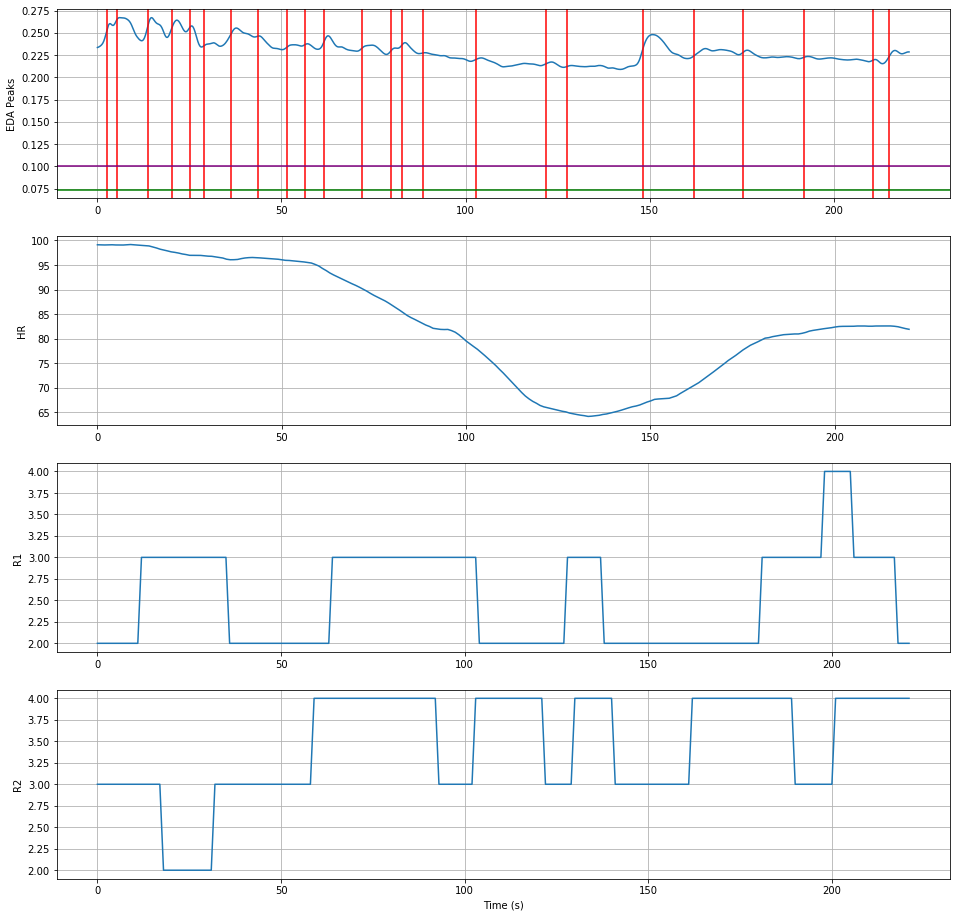

EDA Relax Average: 0.4244
EDA Prep Average: 0.1258


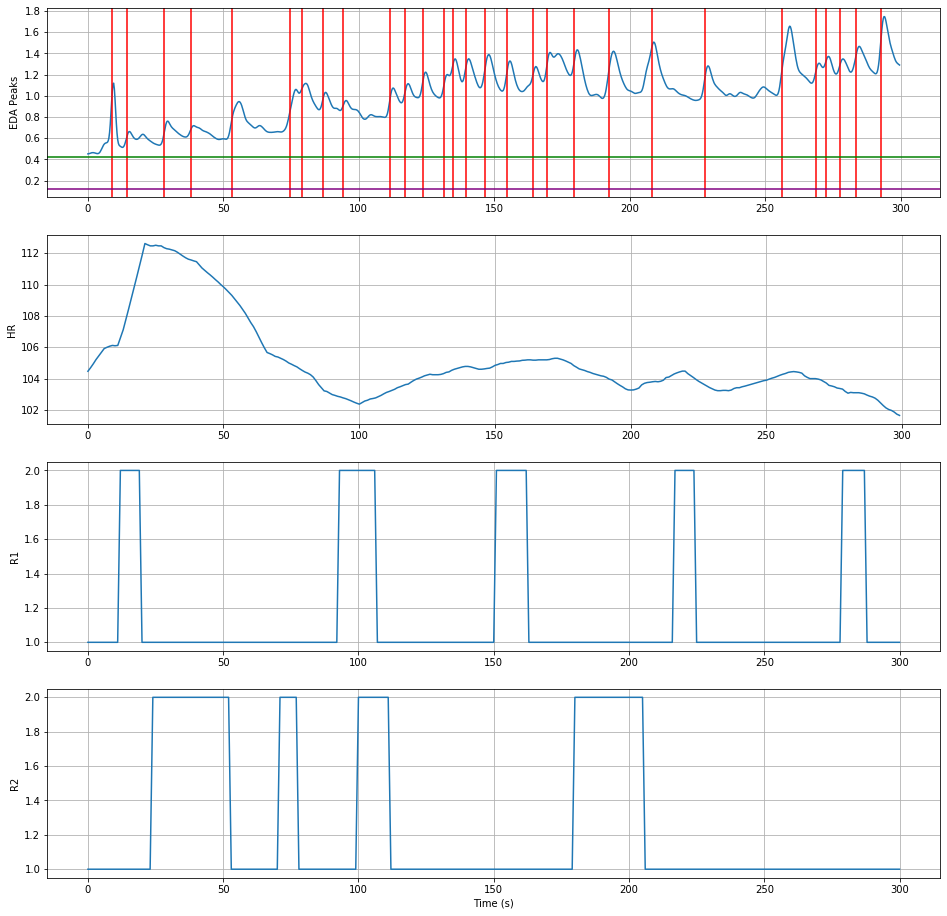

EDA Relax Average: 0.8658
EDA Prep Average: 0.5101


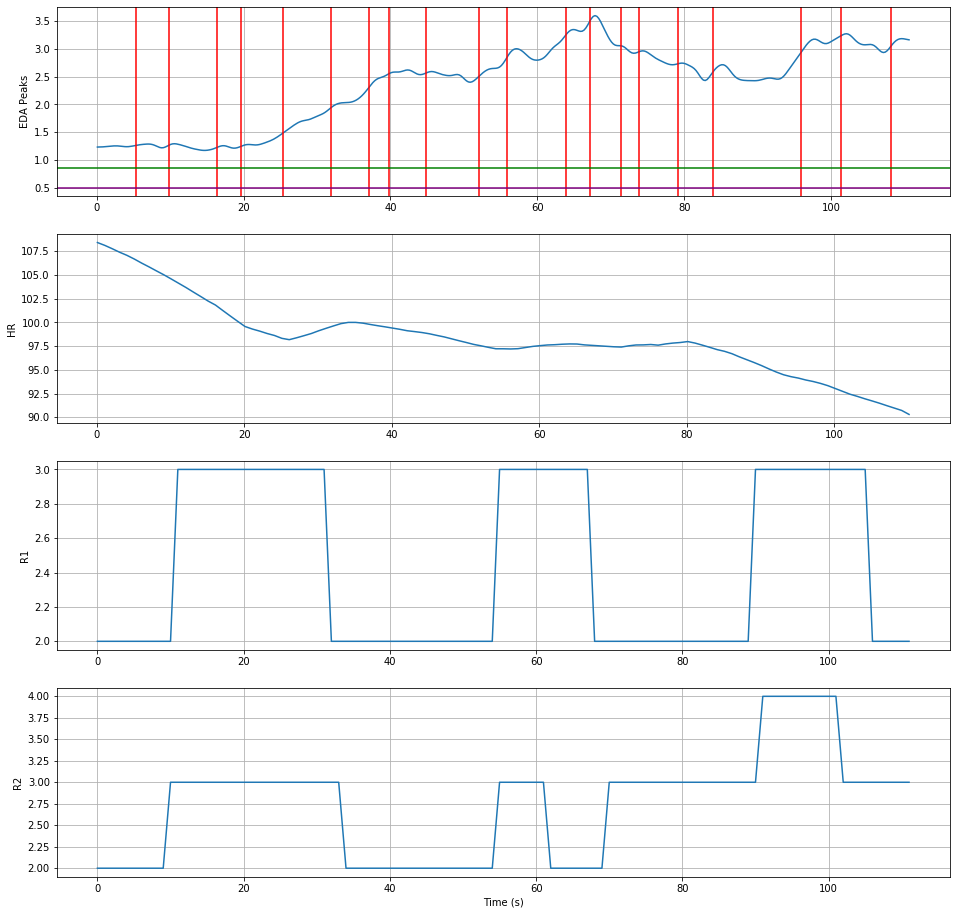

EDA Relax Average: 0.3258
EDA Prep Average: 0.3379


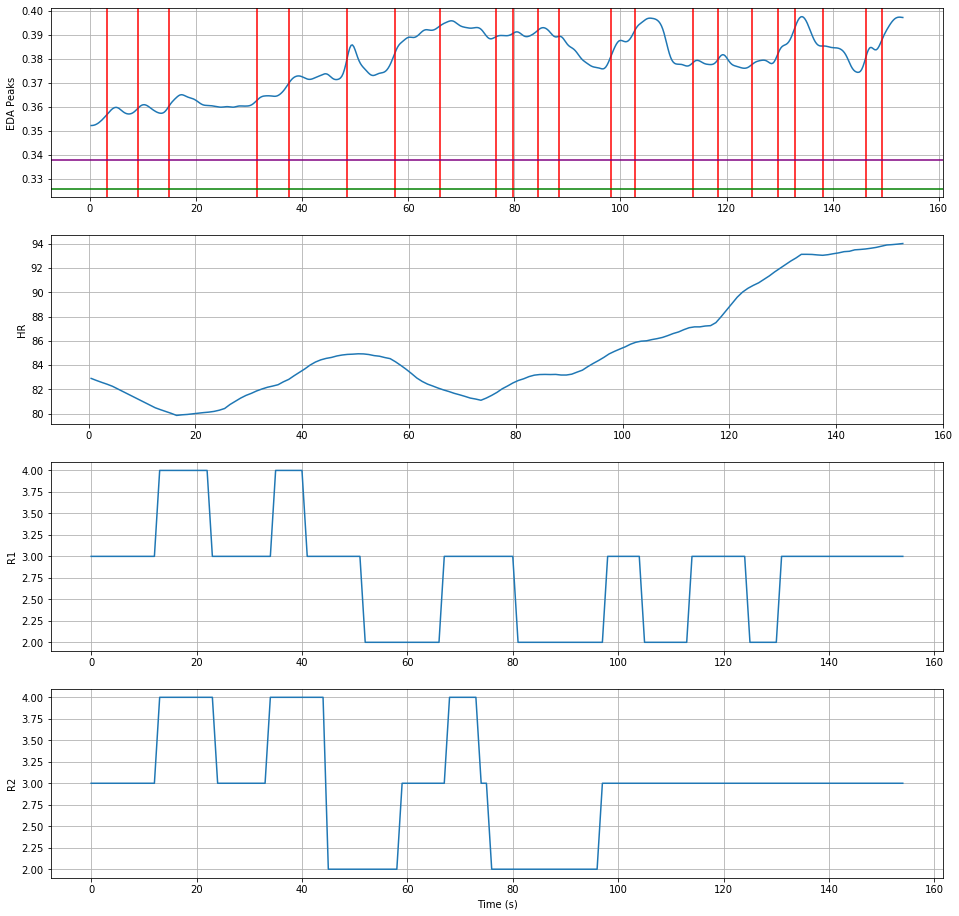

EDA Relax Average: 0.1123
EDA Prep Average: 0.1546


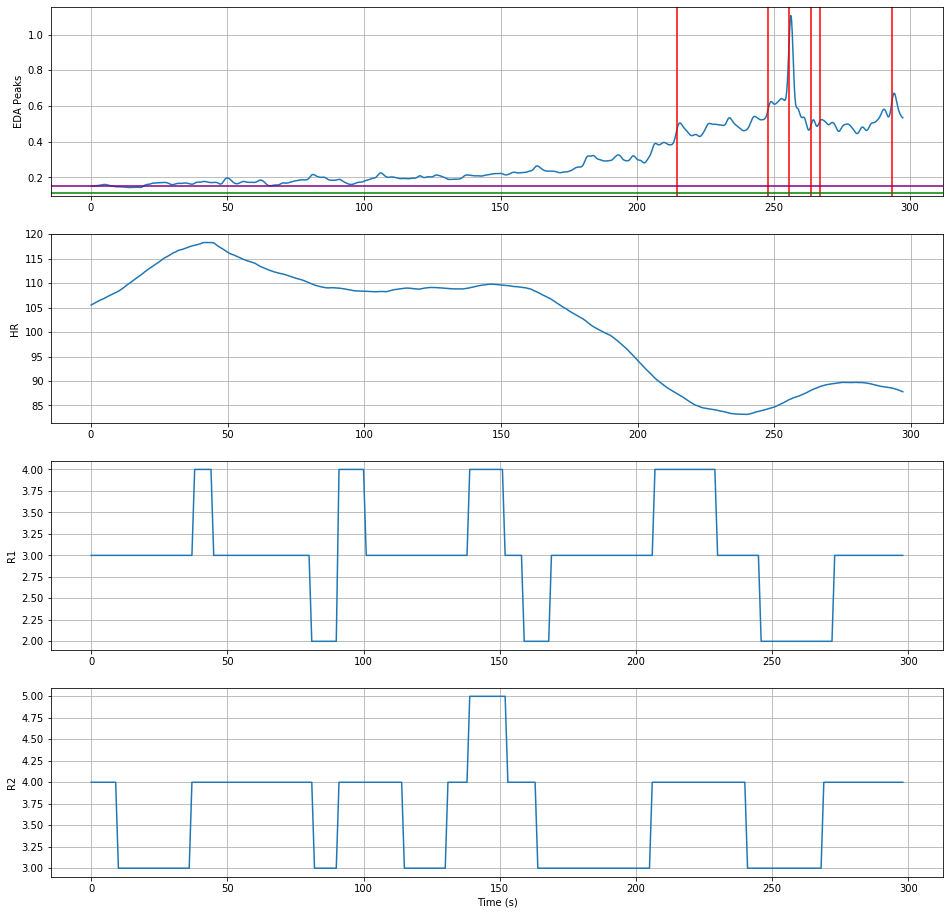

Participant 024 does not have baselines
EDA Relax Average: 0.2409
EDA Prep Average: 0.2979


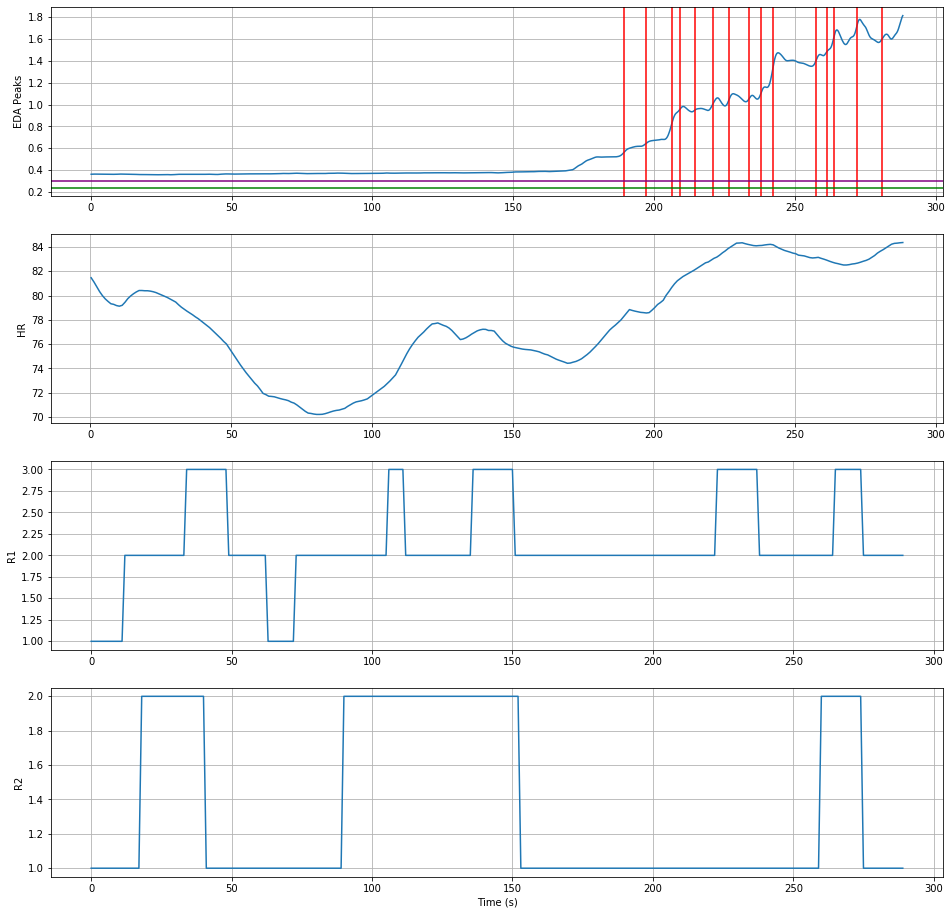

Participant 059 does not have baselines
Participant 029 does not have baselines
Participant 019 does not have baselines
EDA Relax Average: 2.7226
EDA Prep Average: 2.4021


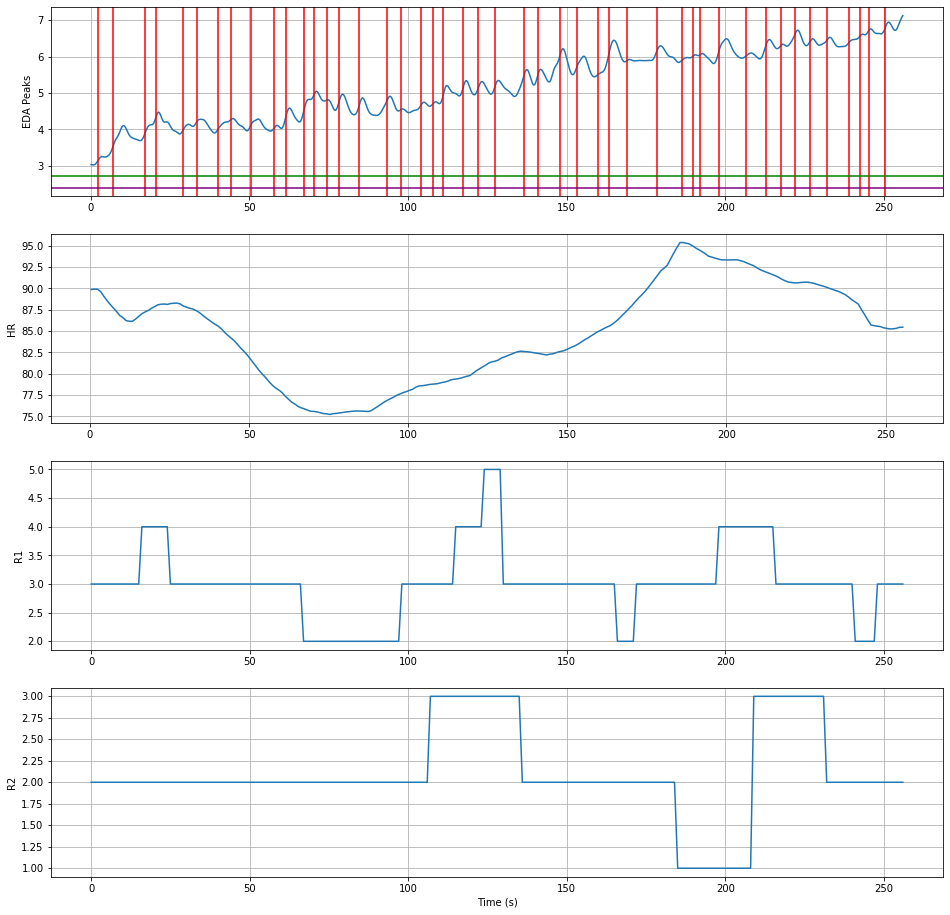

Participant 033 does not have baselines
Participant 010 does not have baselines
Participant 034 does not have baselines
EDA Relax Average: 3.1935
EDA Prep Average: 1.2959


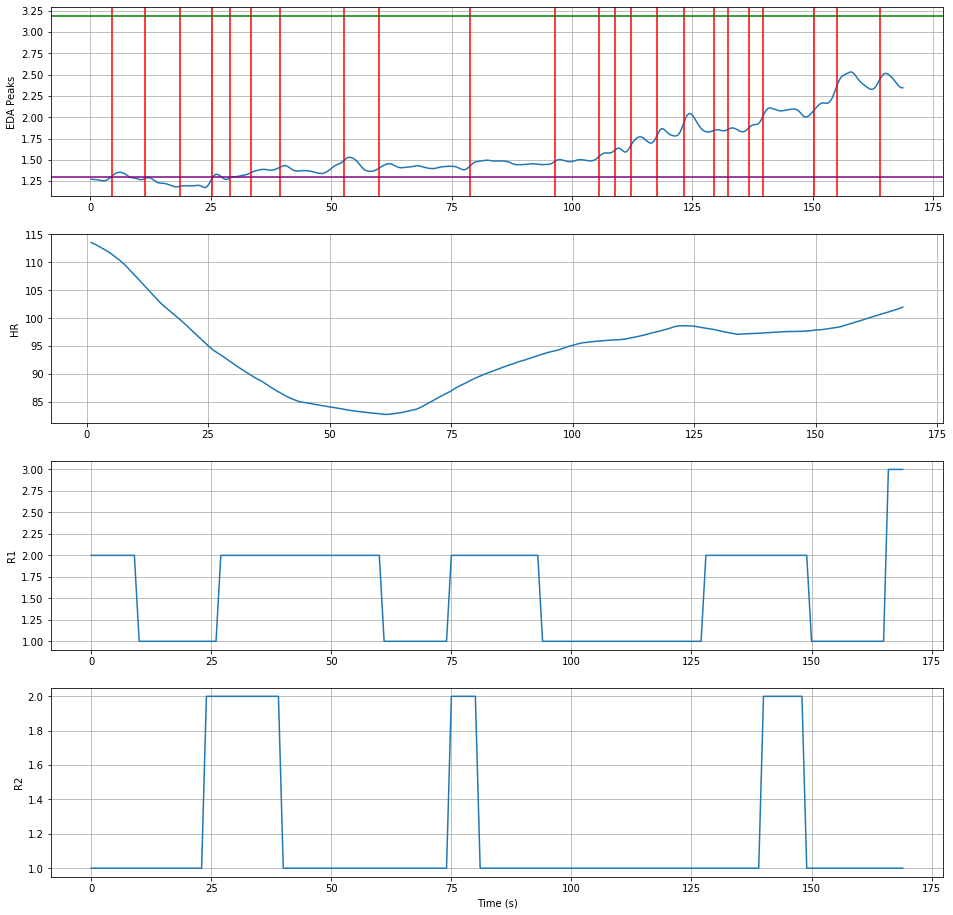

EDA Relax Average: 0.1464
EDA Prep Average: 0.1655


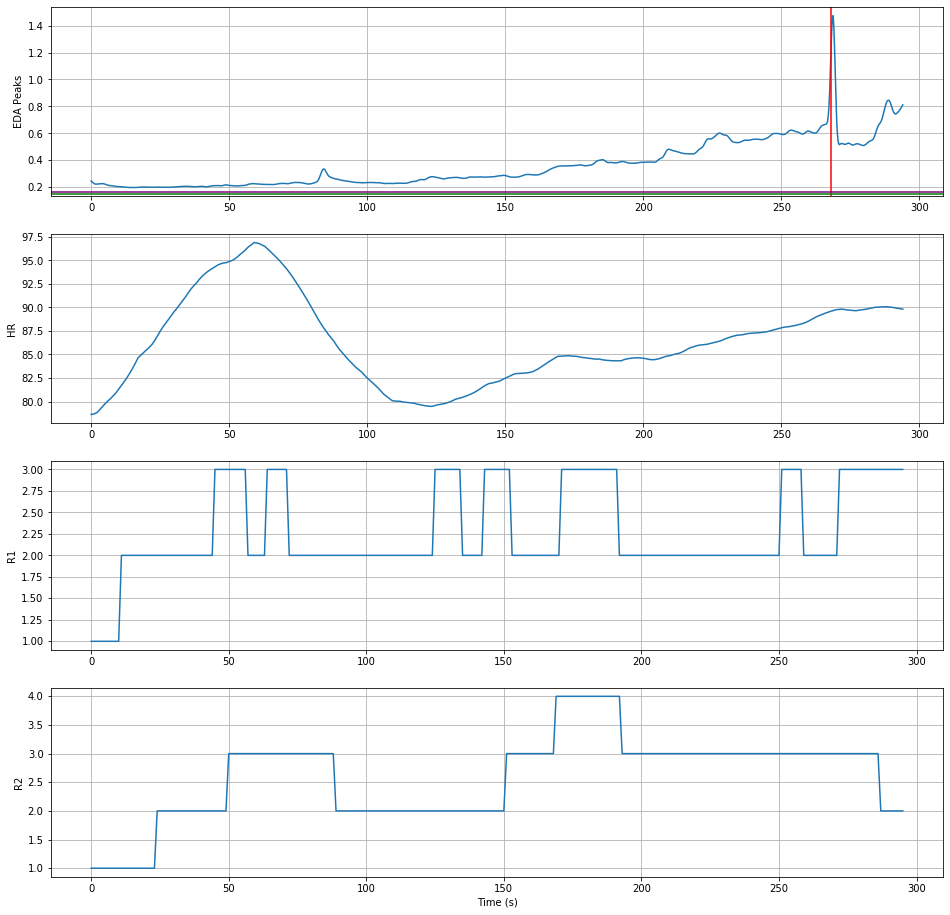

Participant 015 does not have baselines
EDA Relax Average: 0.2374
EDA Prep Average: 0.2692


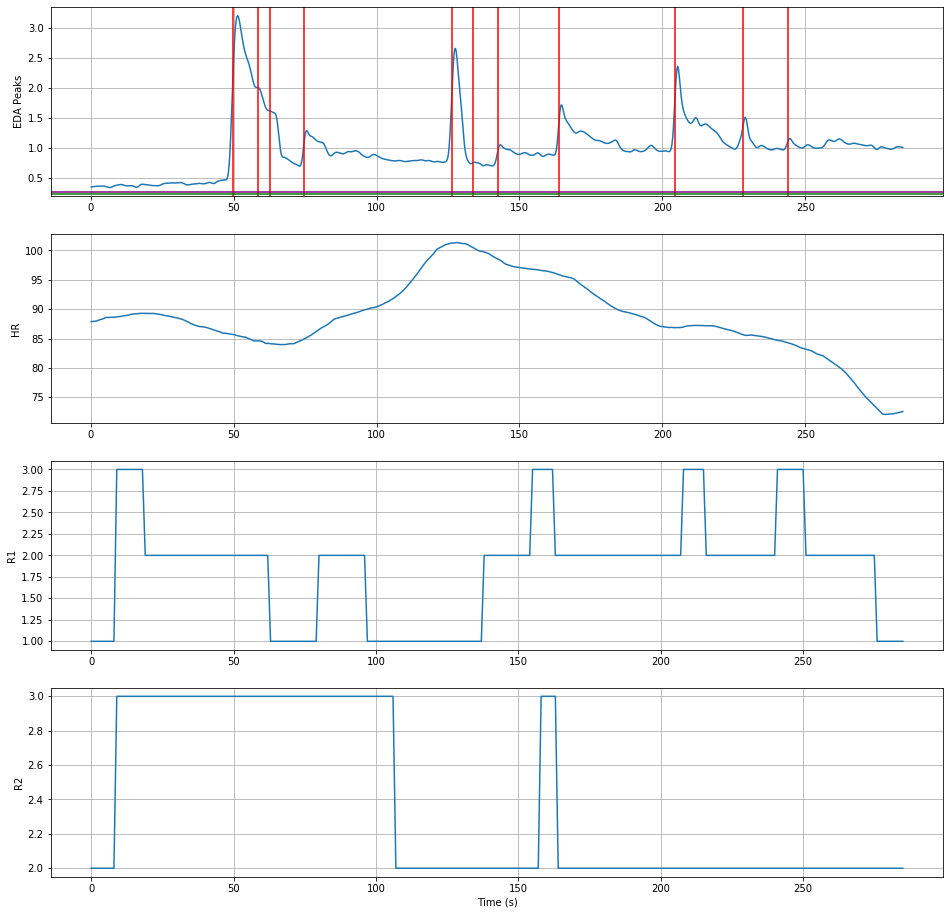

EDA Relax Average: 0.4835
EDA Prep Average: 0.4490


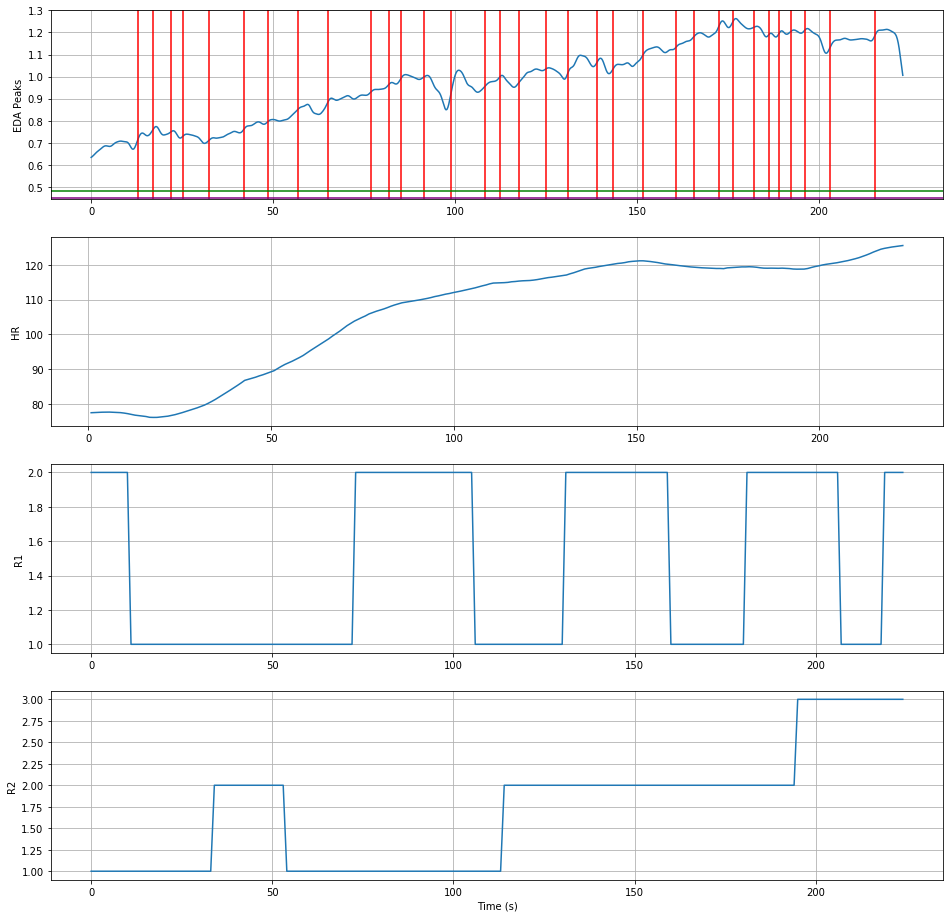

EDA Relax Average: 0.0919
EDA Prep Average: 0.1046


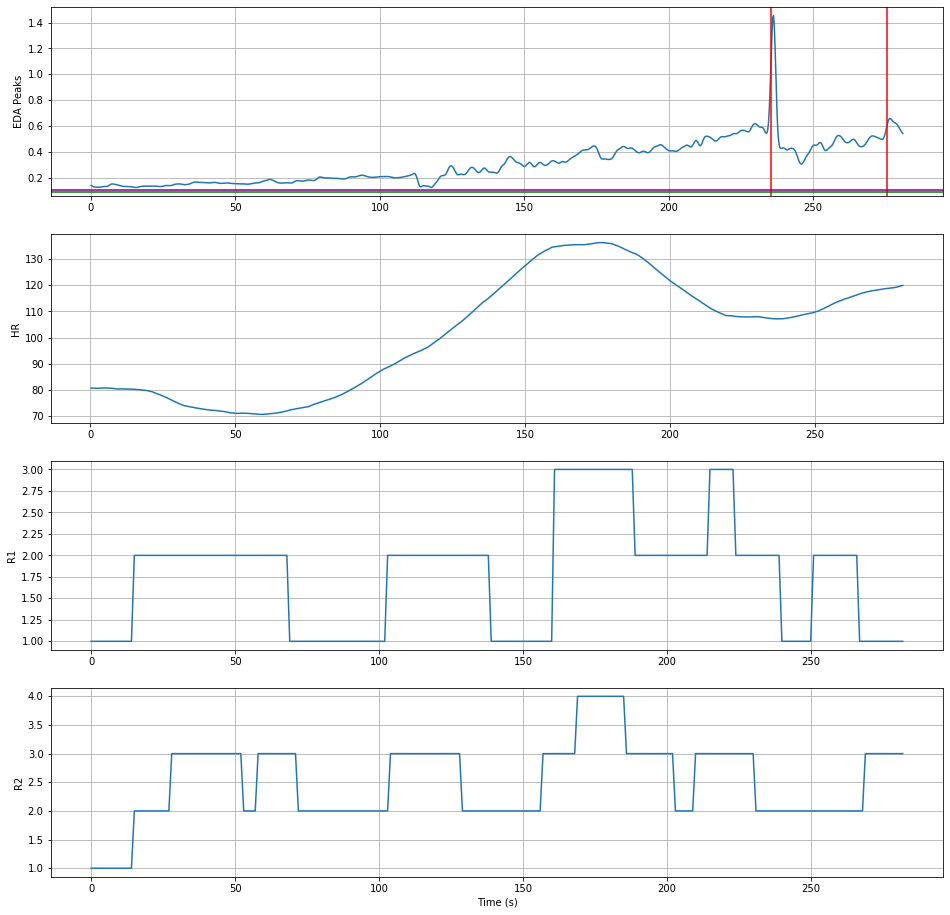

EDA Relax Average: 0.3533
EDA Prep Average: 0.3604


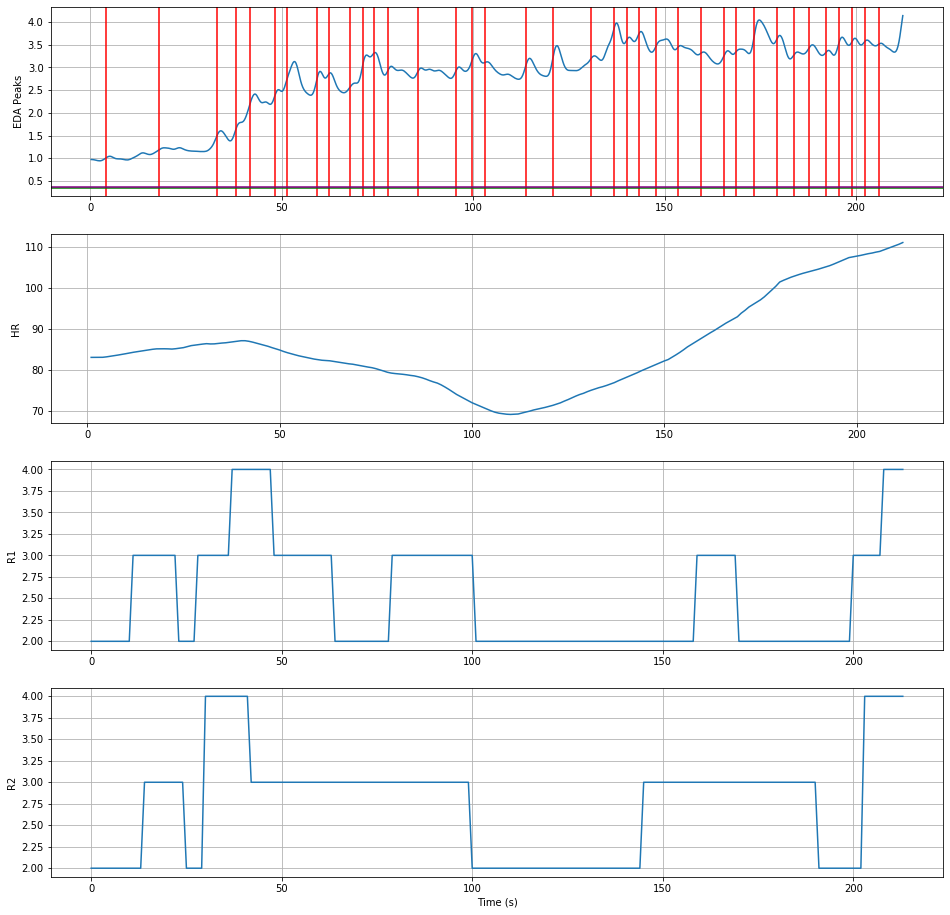

EDA Relax Average: 0.1495
EDA Prep Average: 0.2917


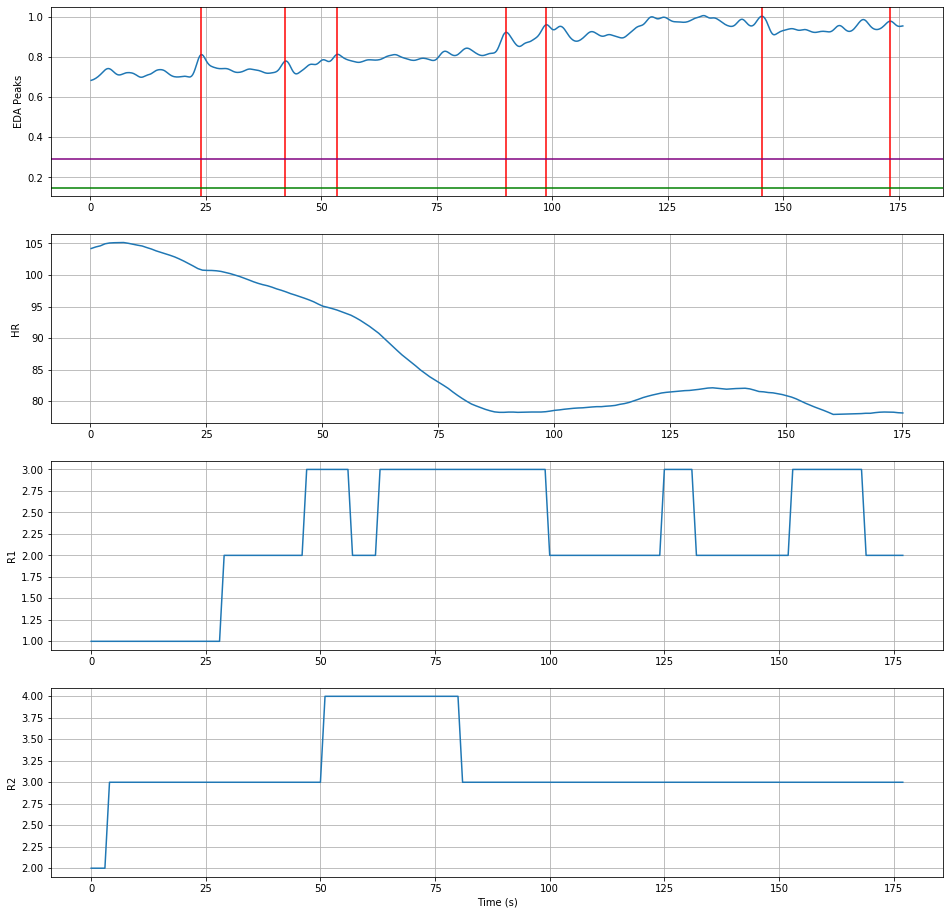

EDA Relax Average: 0.1726
EDA Prep Average: 0.1756


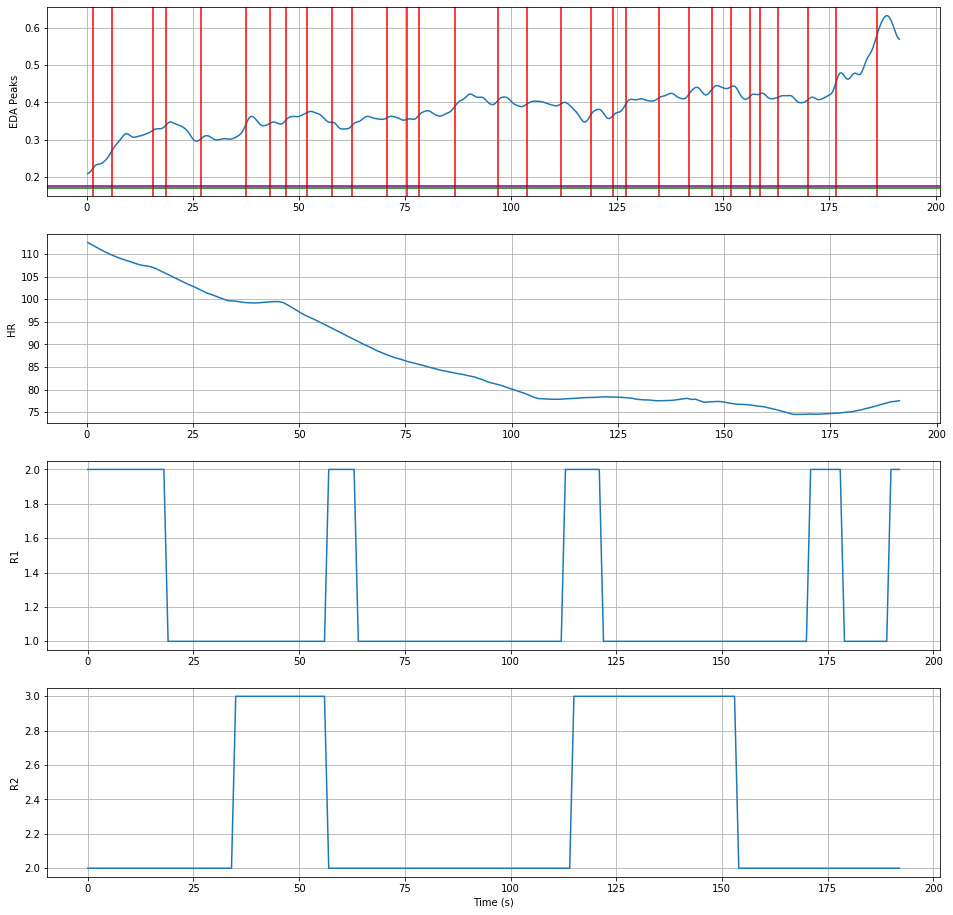

EDA Relax Average: 0.1459
EDA Prep Average: 0.5265


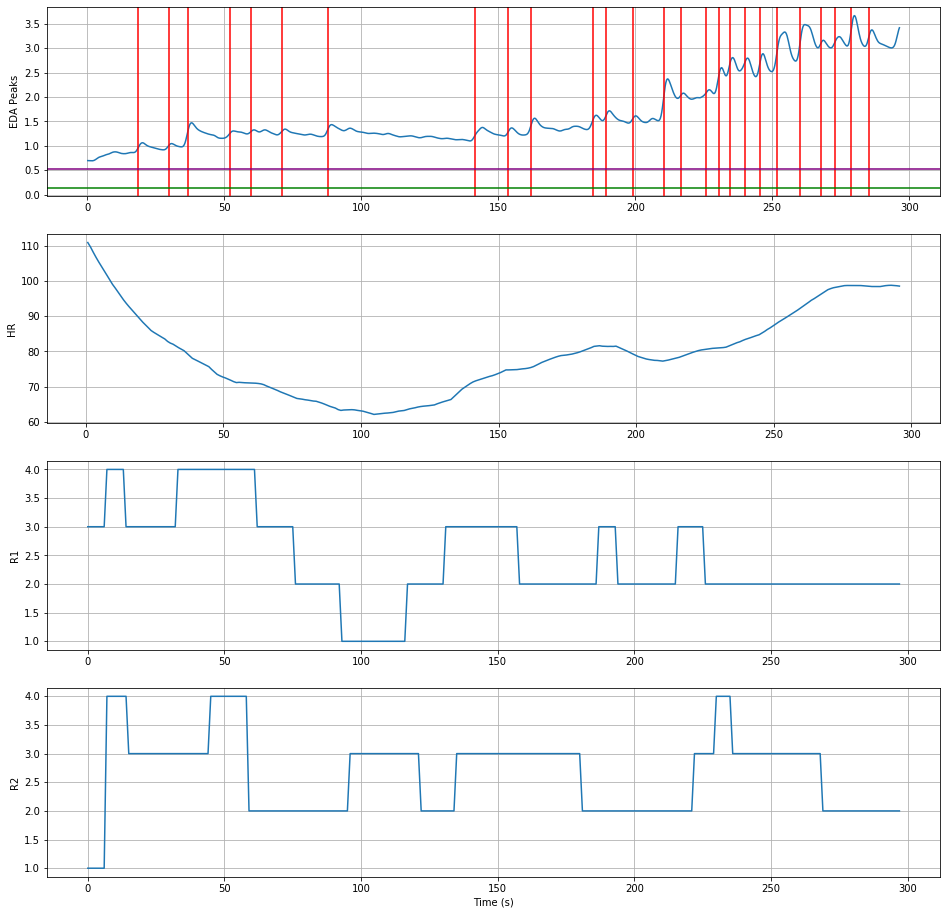

Participant 054 does not have baselines
EDA Relax Average: 0.2397
EDA Prep Average: 0.3302


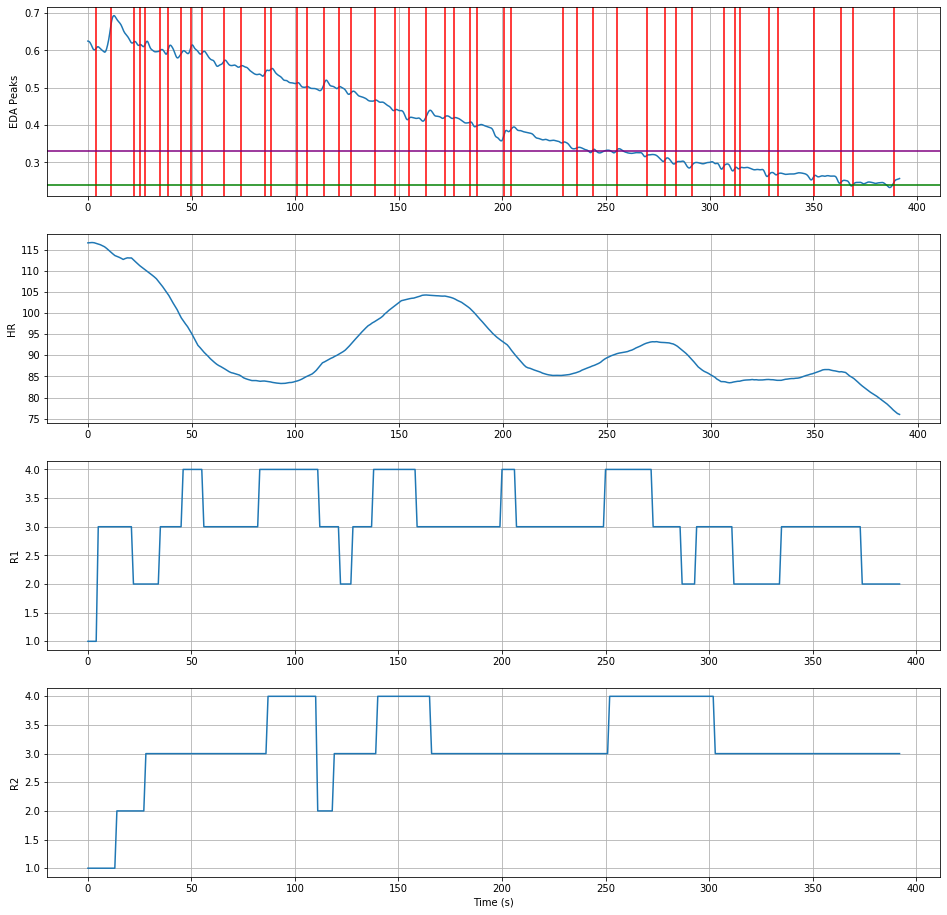

EDA Relax Average: 0.1510
EDA Prep Average: 0.1200


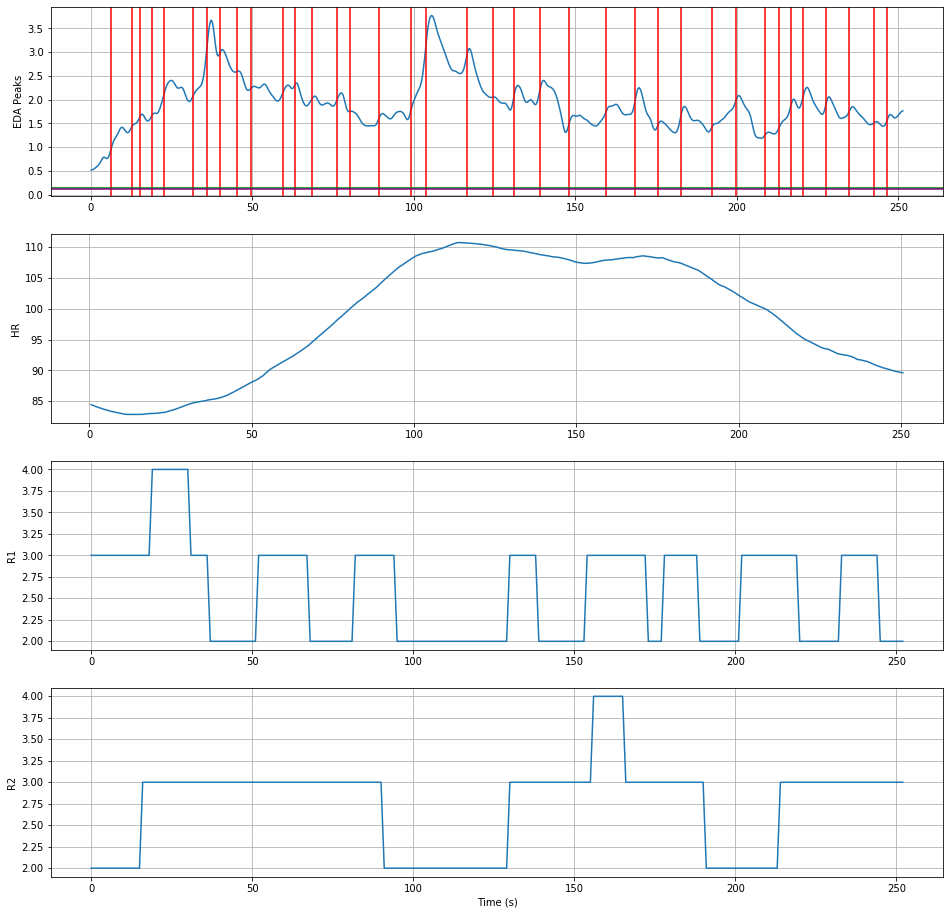

EDA Relax Average: 1.0542
EDA Prep Average: 0.8501


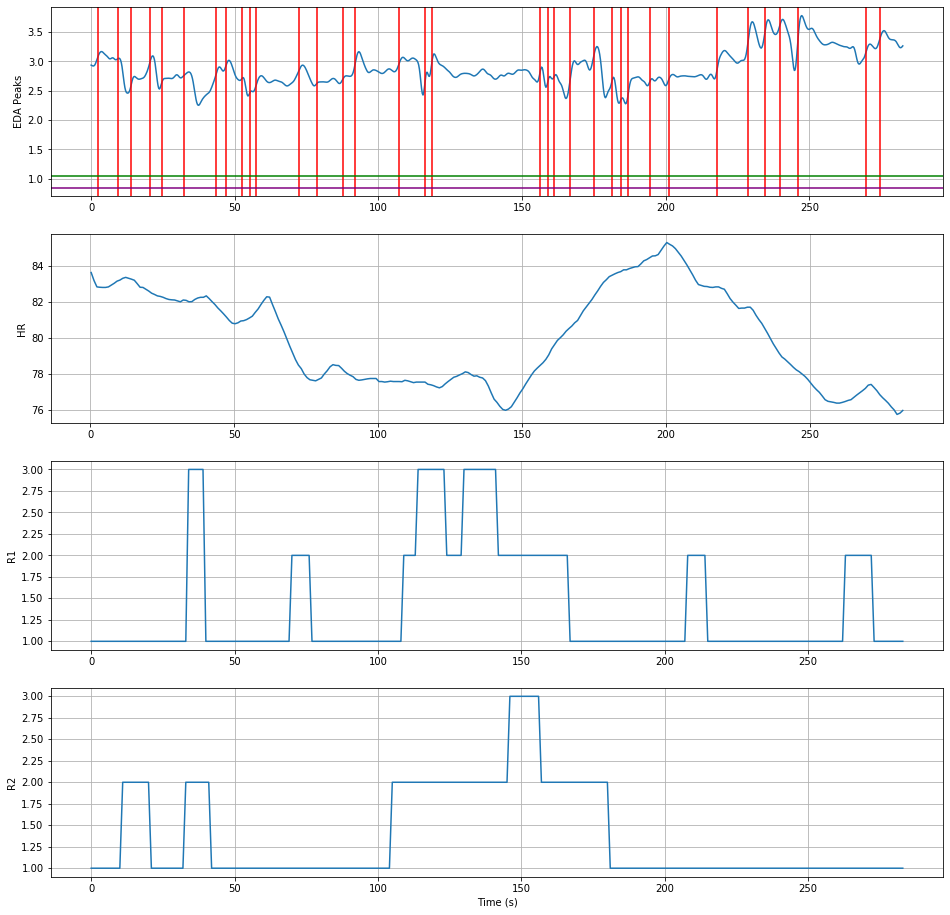

Participant 055 does not have baselines
EDA Relax Average: 0.7148
EDA Prep Average: 1.1718


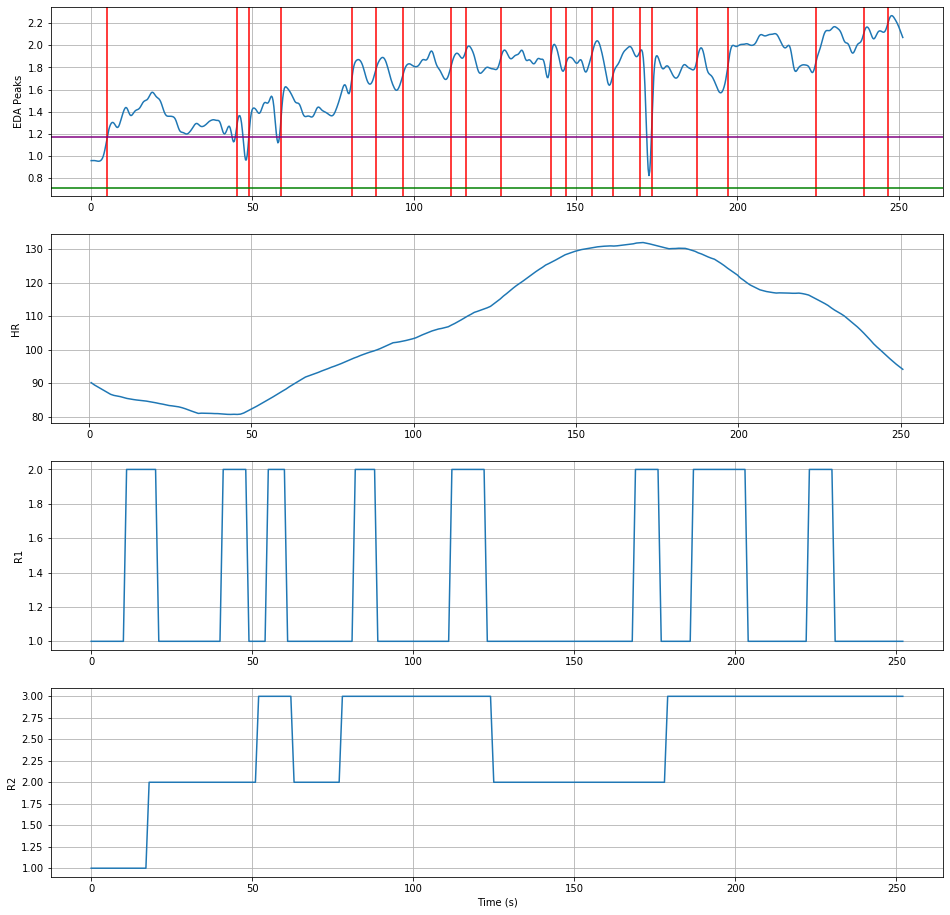

EDA Relax Average: 0.1543
EDA Prep Average: 0.1672


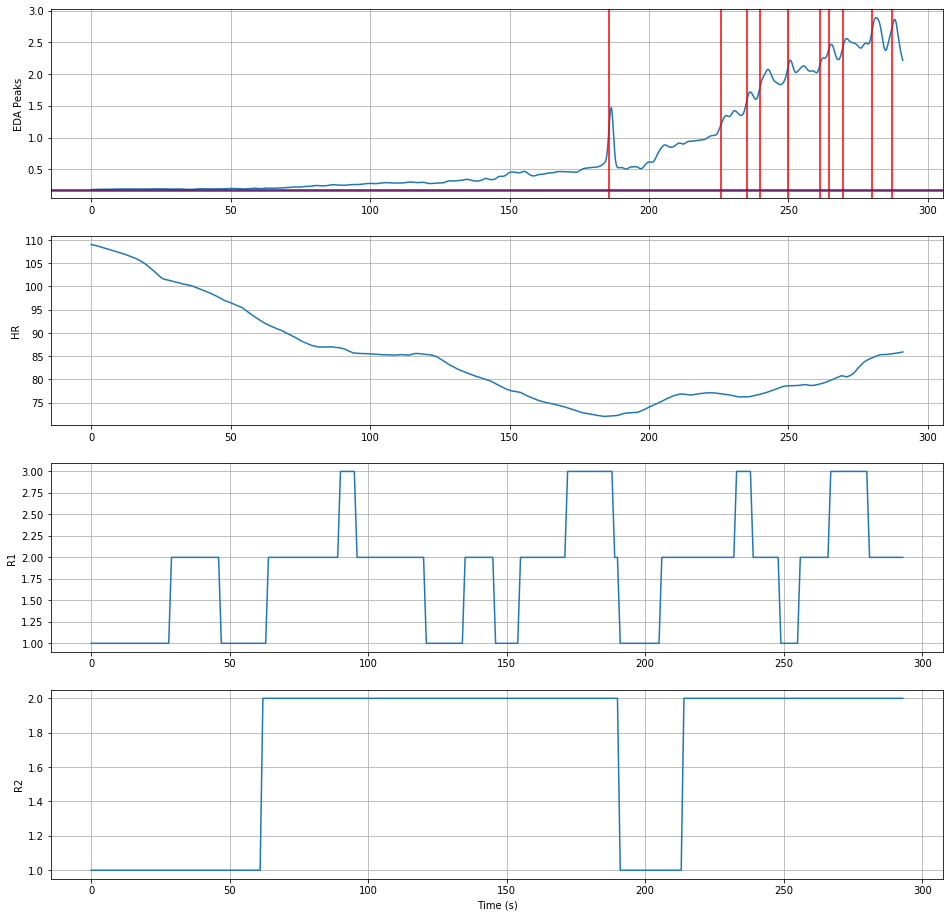

Participant 025 does not have baselines
EDA Relax Average: 0.2437
EDA Prep Average: 0.2754


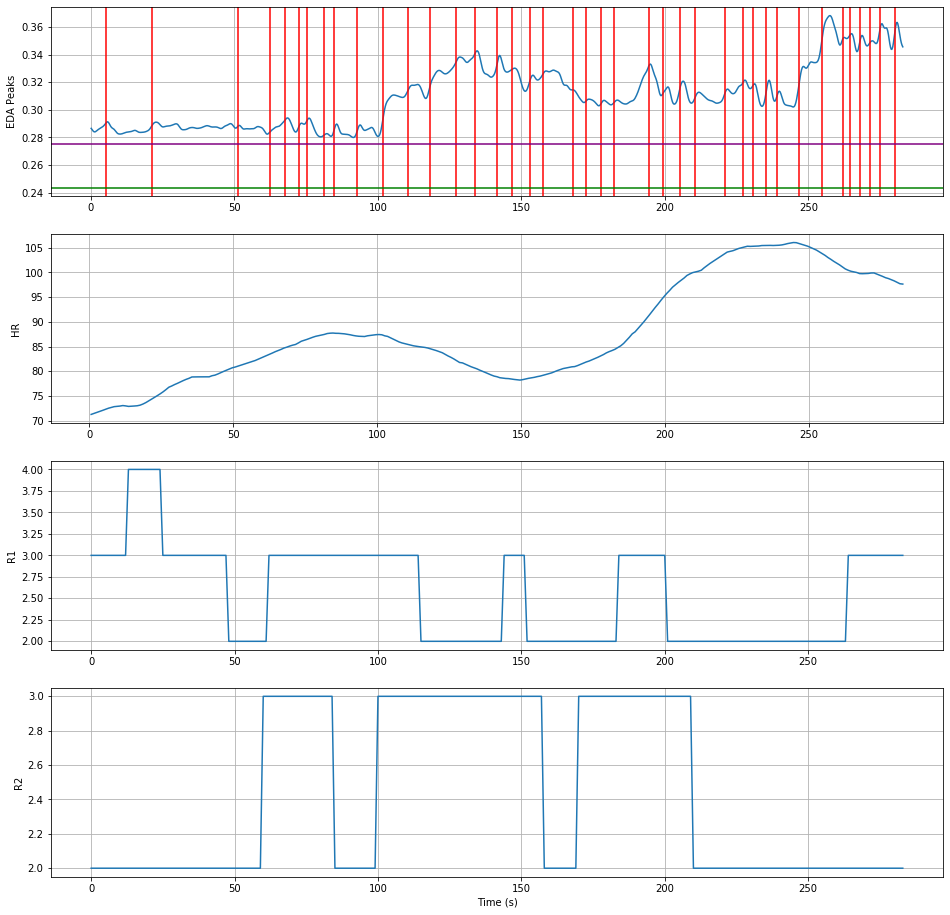

EDA Relax Average: 0.1681
EDA Prep Average: 0.5372


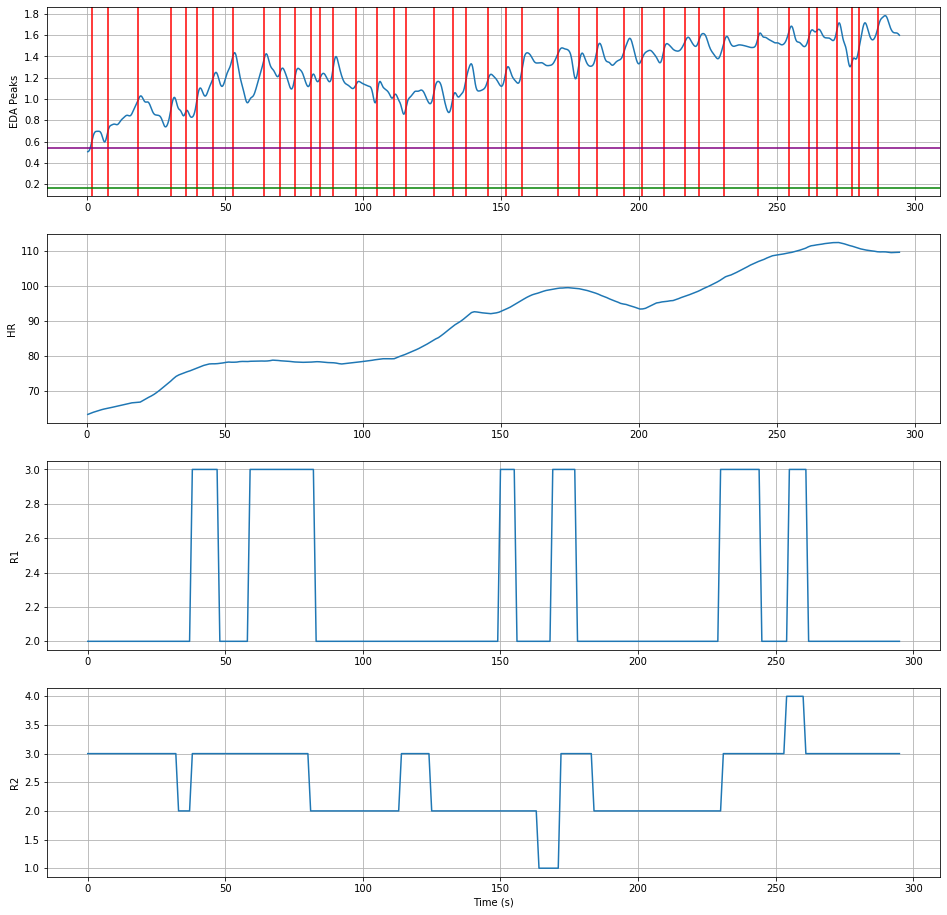

EDA Relax Average: 0.1690
EDA Prep Average: 0.1846


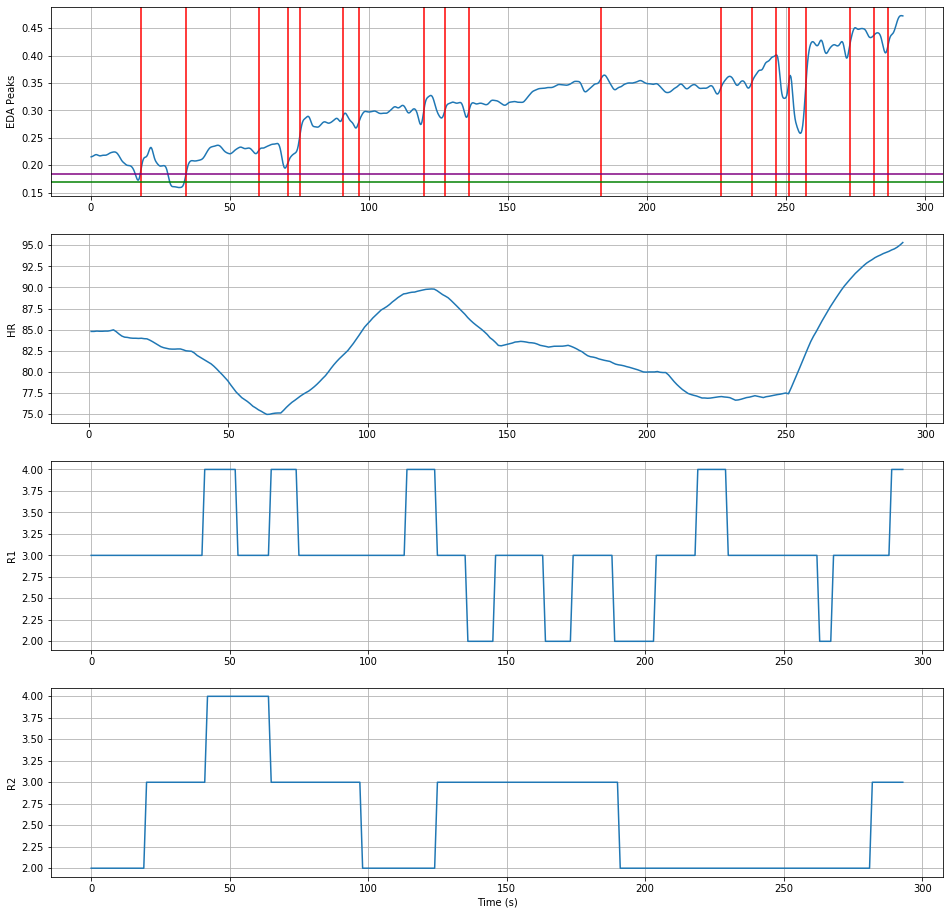

EDA Relax Average: 1.3542
EDA Prep Average: 0.7048


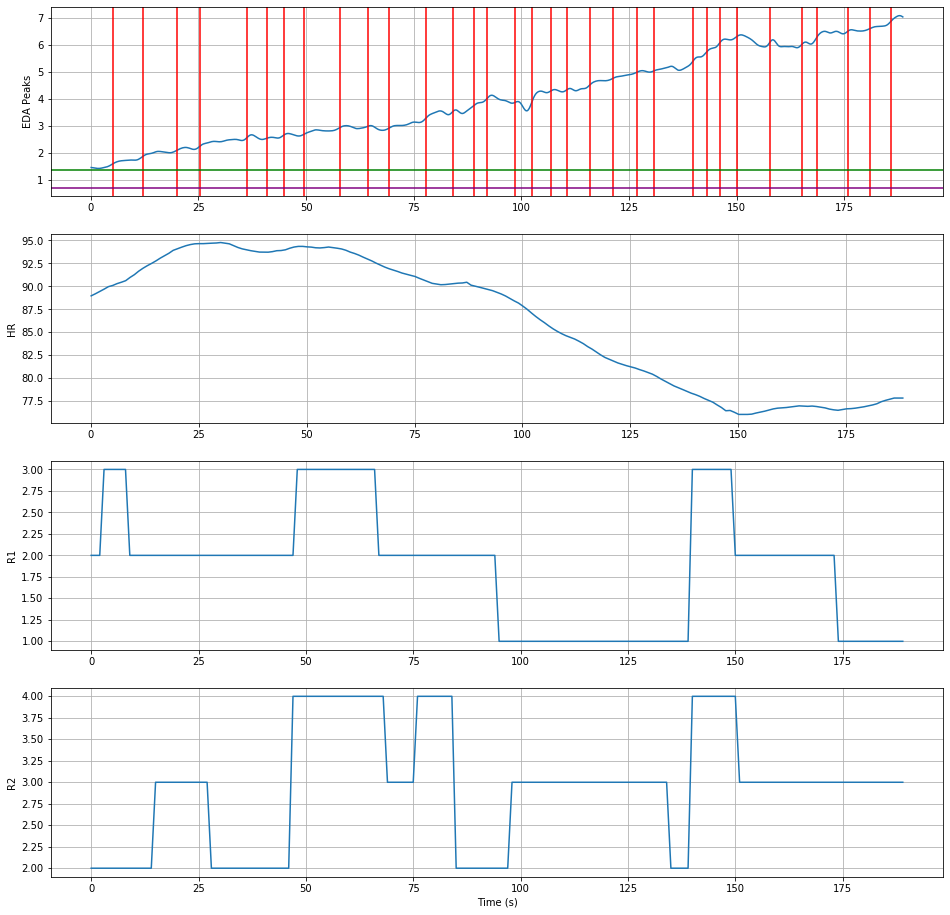

EDA Relax Average: 1.8304
EDA Prep Average: 2.3294


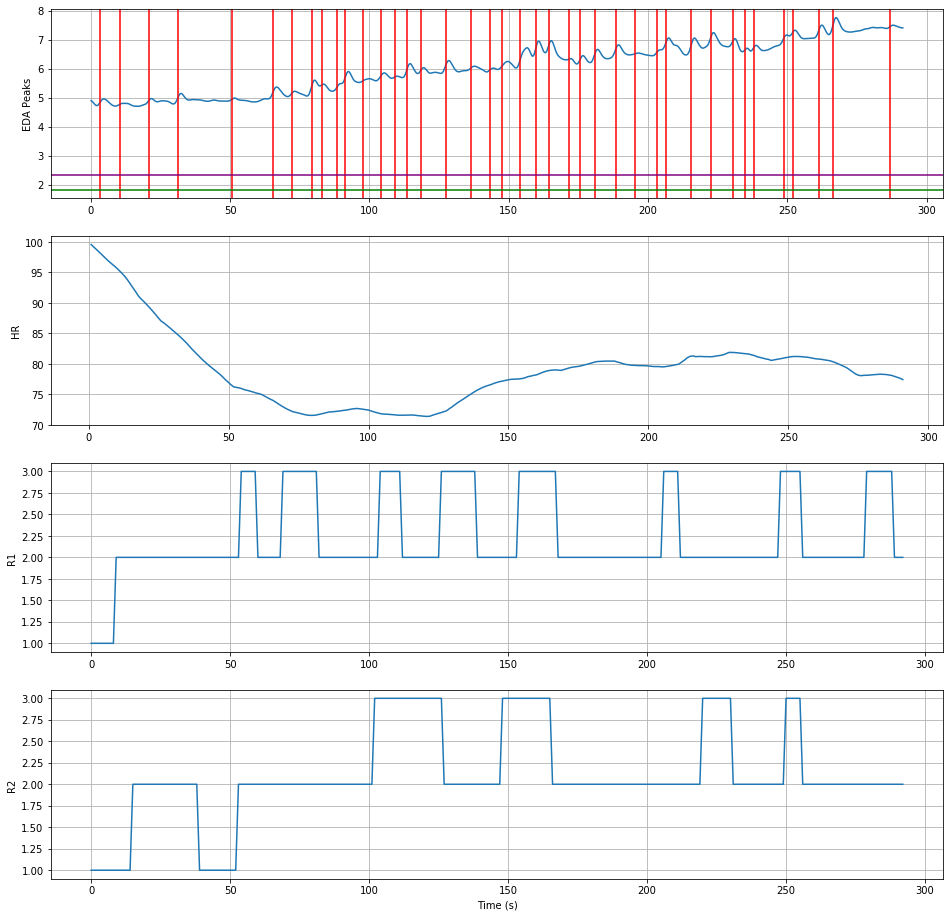

EDA Relax Average: 0.2247
EDA Prep Average: 0.2592


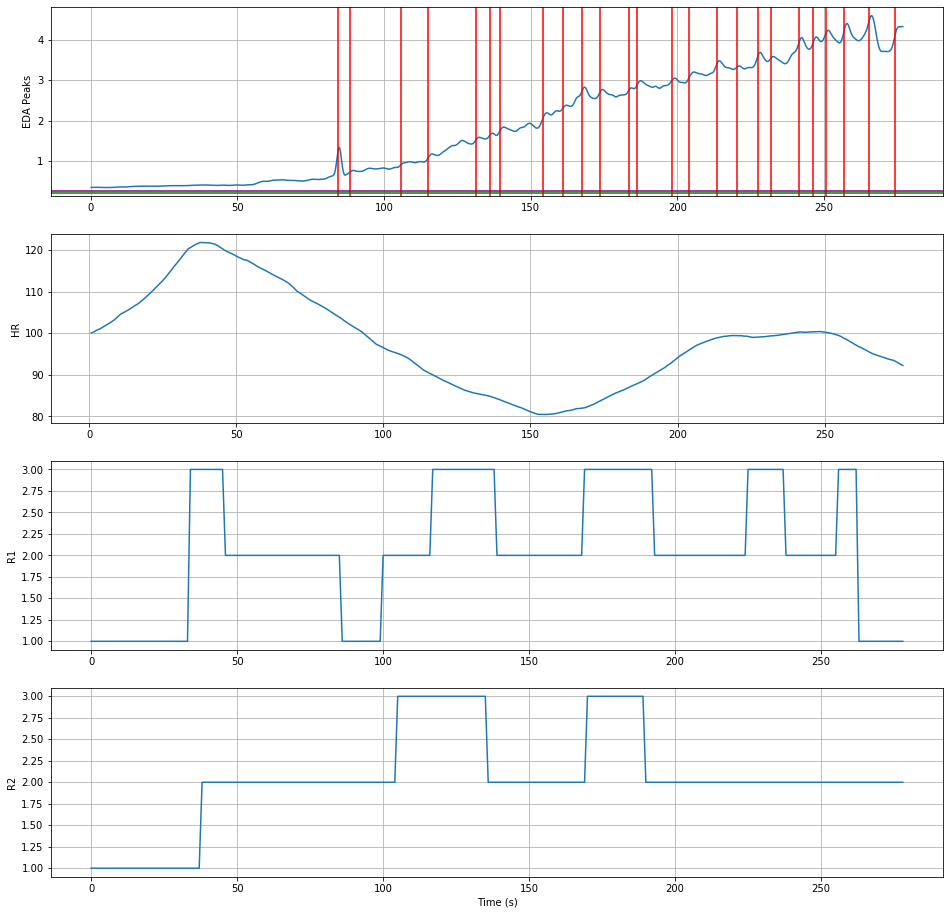

Participant 036 does not have baselines
EDA Relax Average: 0.9704
EDA Prep Average: 0.4259


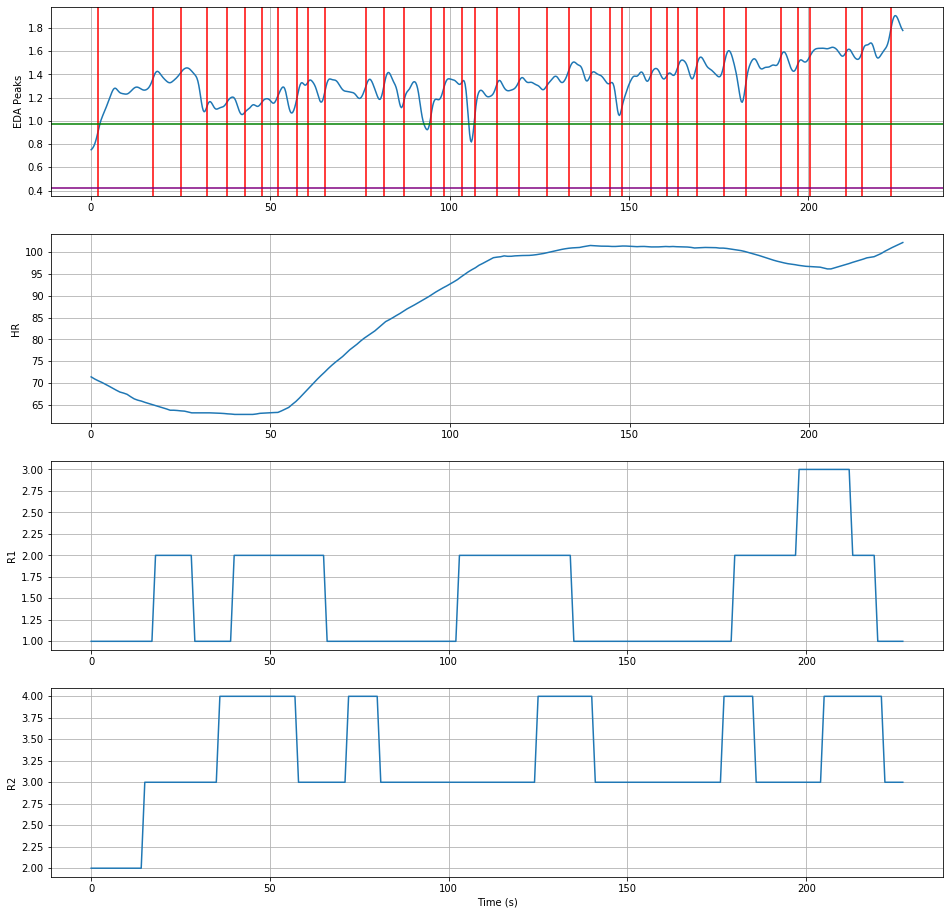

EDA Relax Average: 0.0619
EDA Prep Average: 0.0638


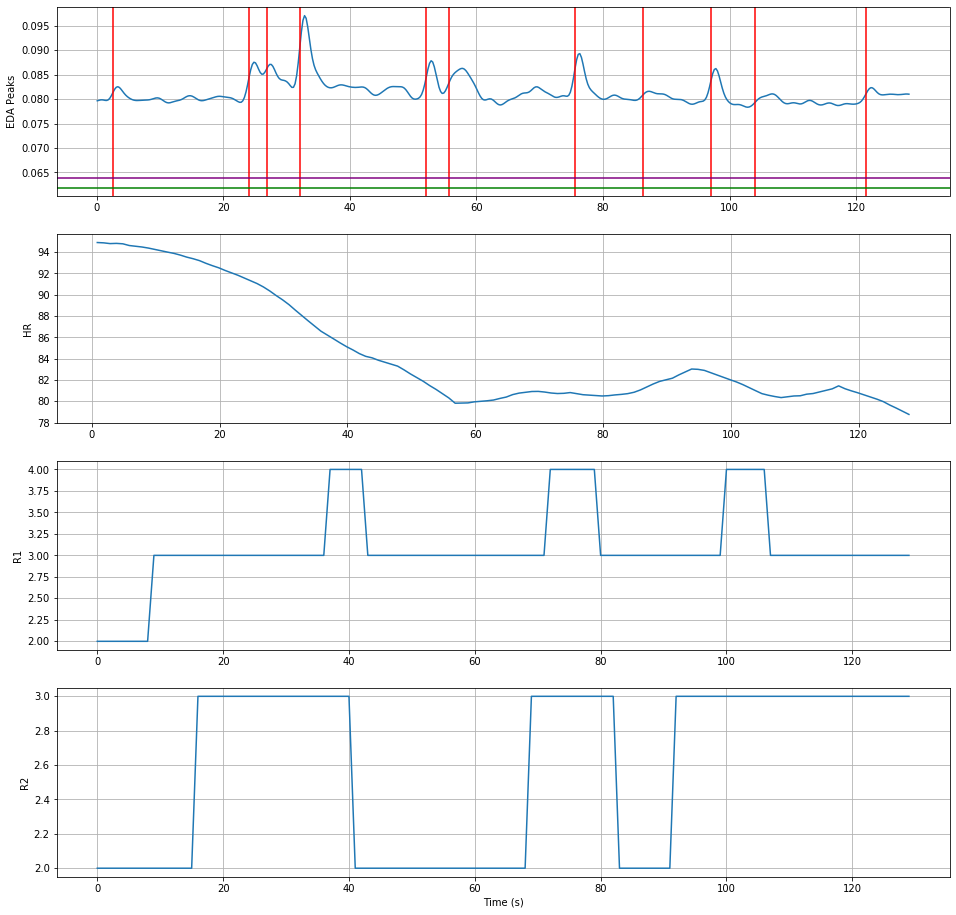

Participant 022 does not have baselines
EDA Relax Average: 0.3324
EDA Prep Average: 0.3671


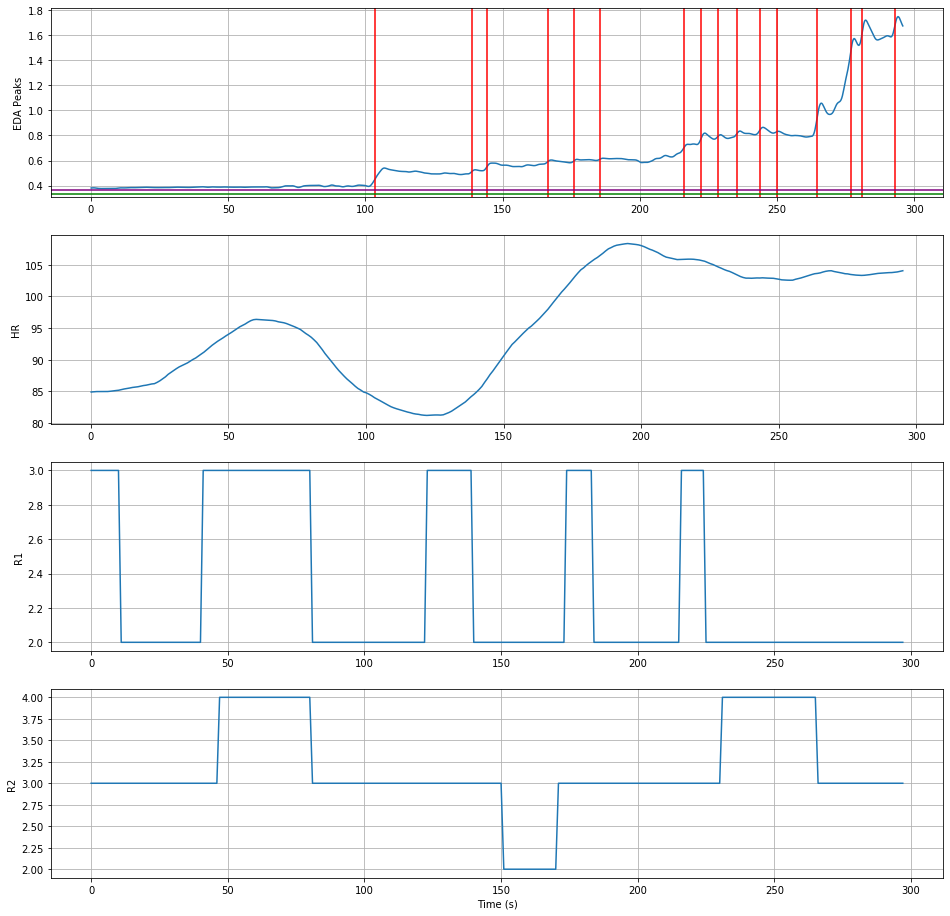

EDA Relax Average: 0.4946
EDA Prep Average: 0.8295


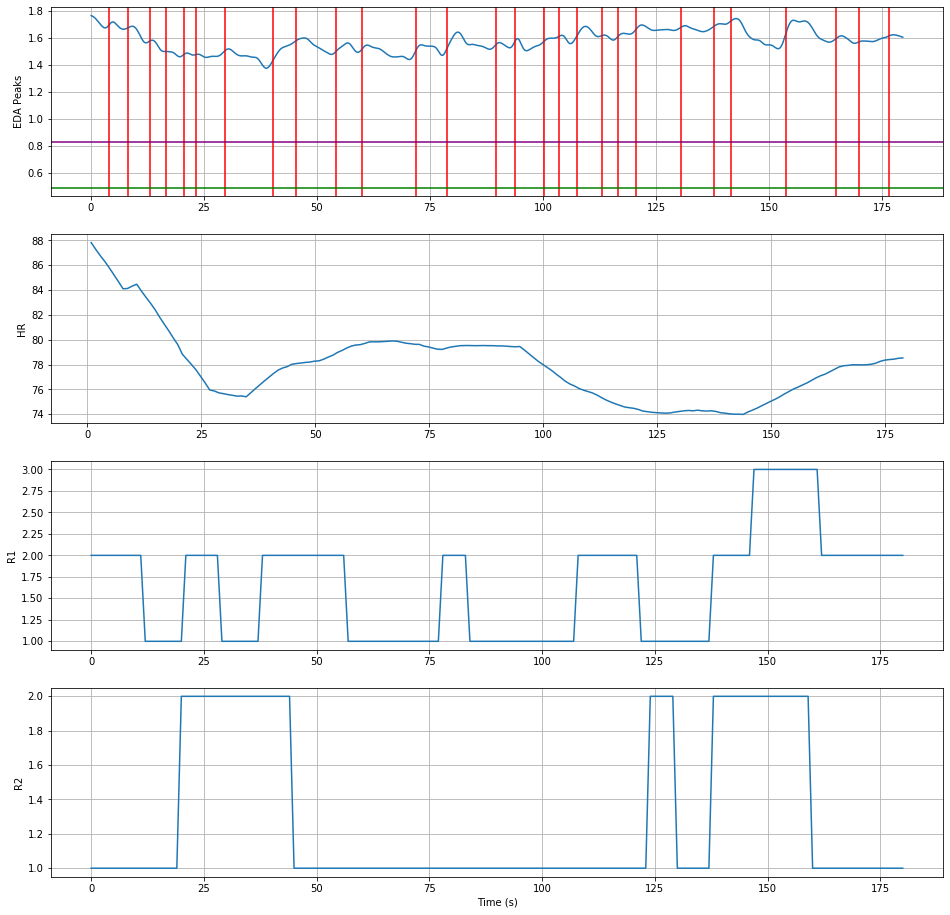

EDA Relax Average: 0.1591
EDA Prep Average: 0.1658


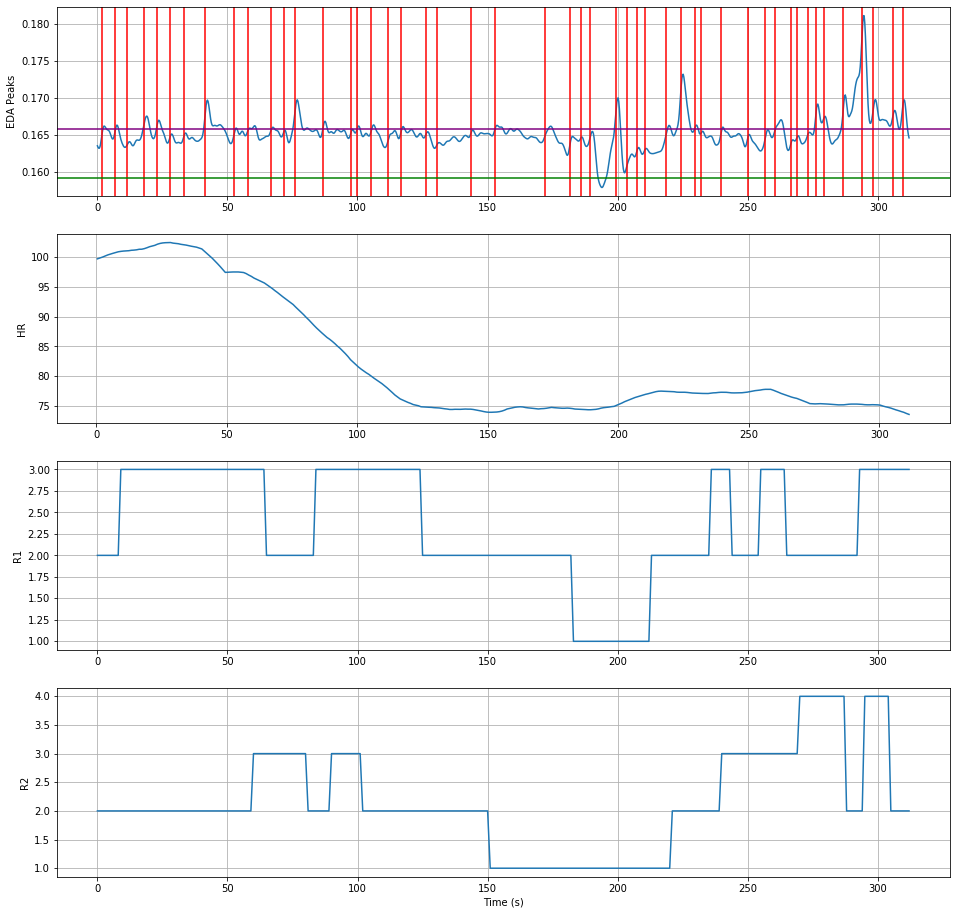

Participant 070 does not have baselines
EDA Relax Average: 0.0455
EDA Prep Average: 0.0534


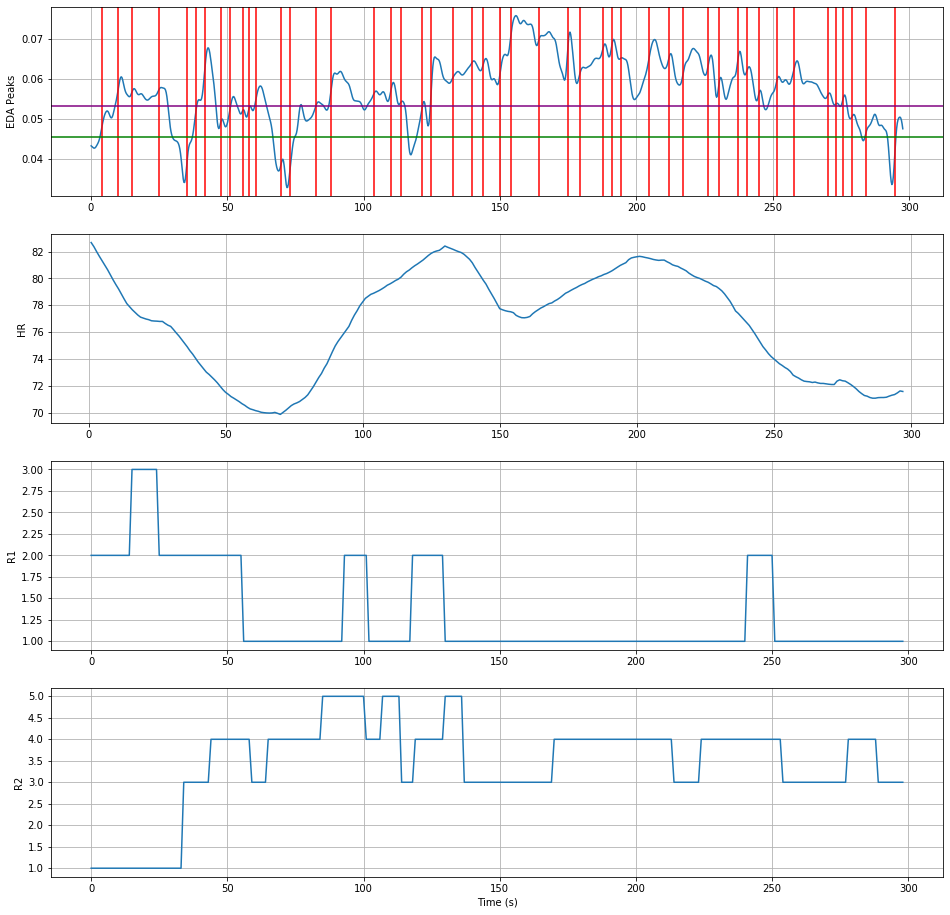

EDA Relax Average: 0.2529
EDA Prep Average: 0.3054


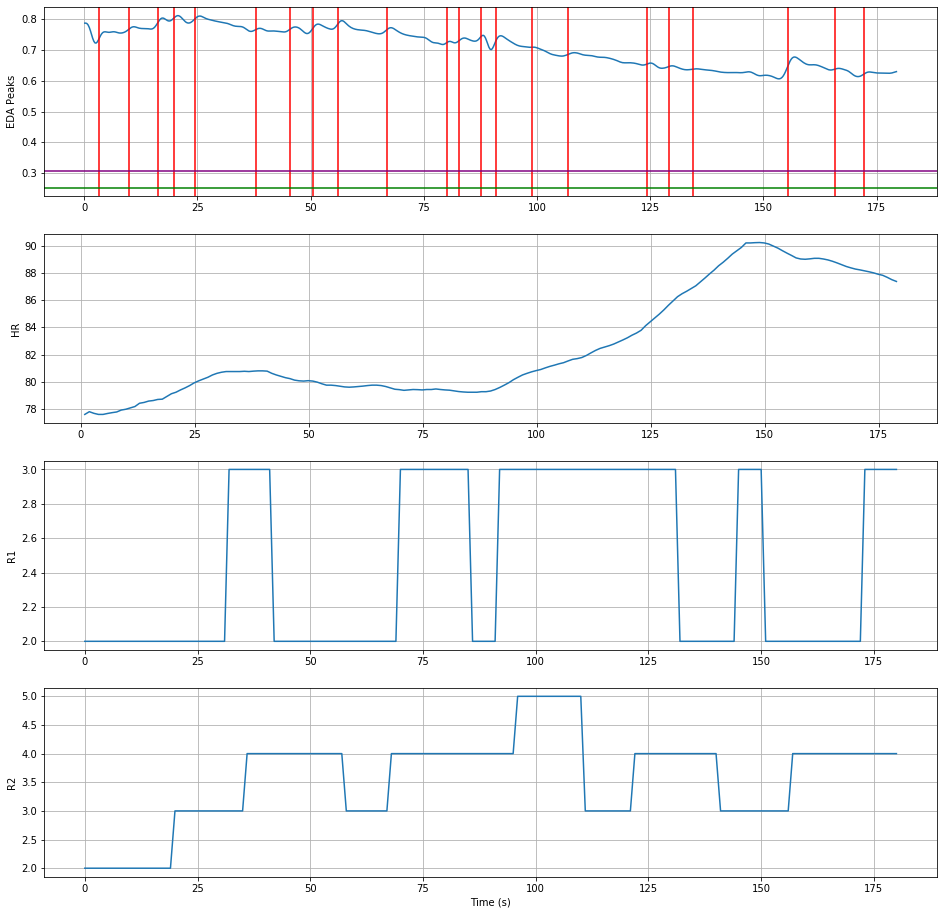

EDA Relax Average: 0.5670
EDA Prep Average: 1.7439


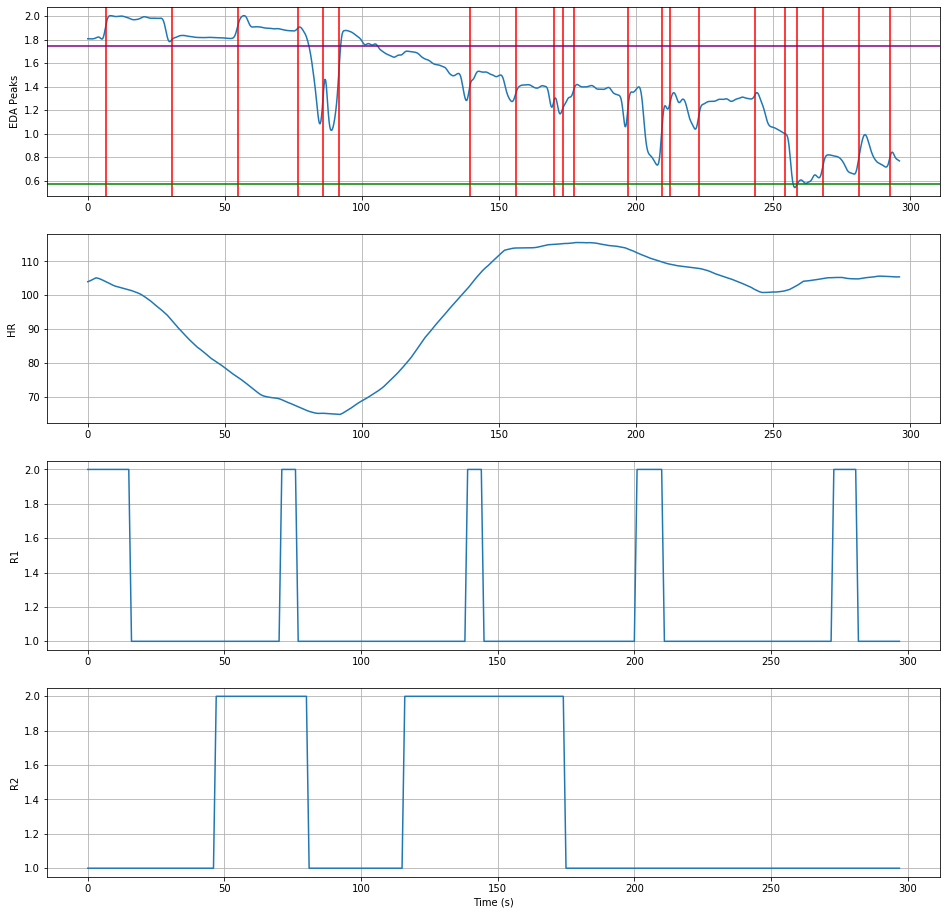

EDA Relax Average: 0.3196
EDA Prep Average: 0.3077


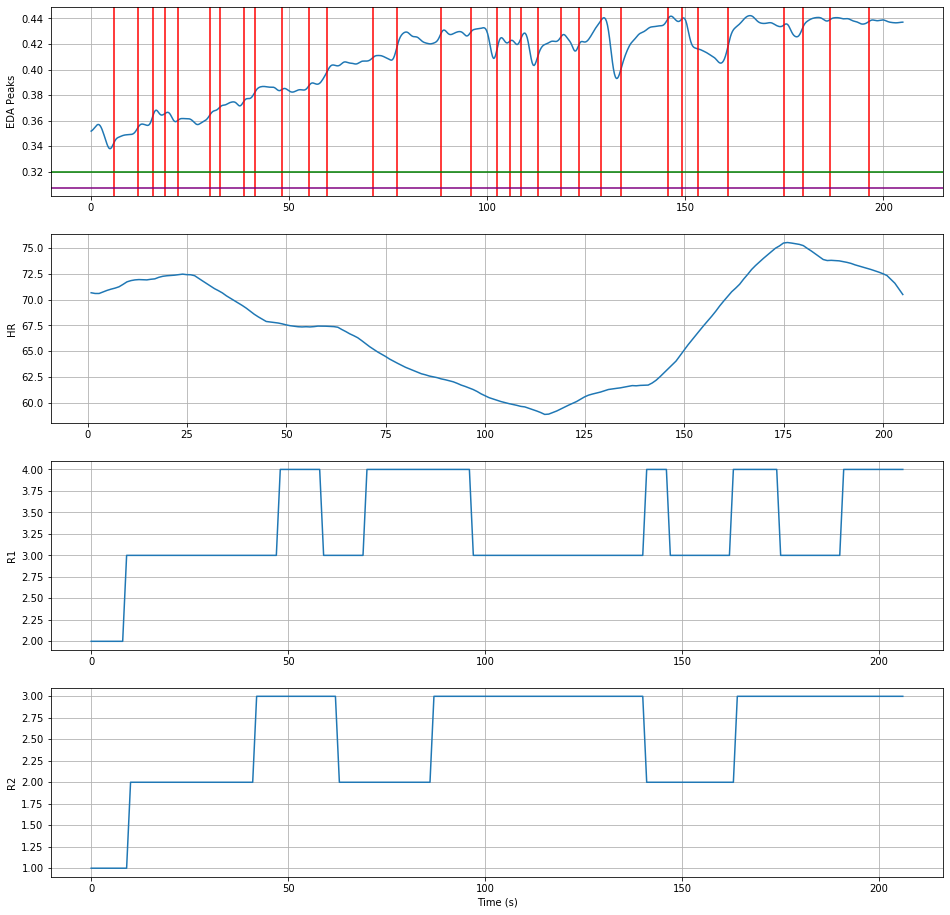

EDA Relax Average: 0.3466
EDA Prep Average: 0.8447


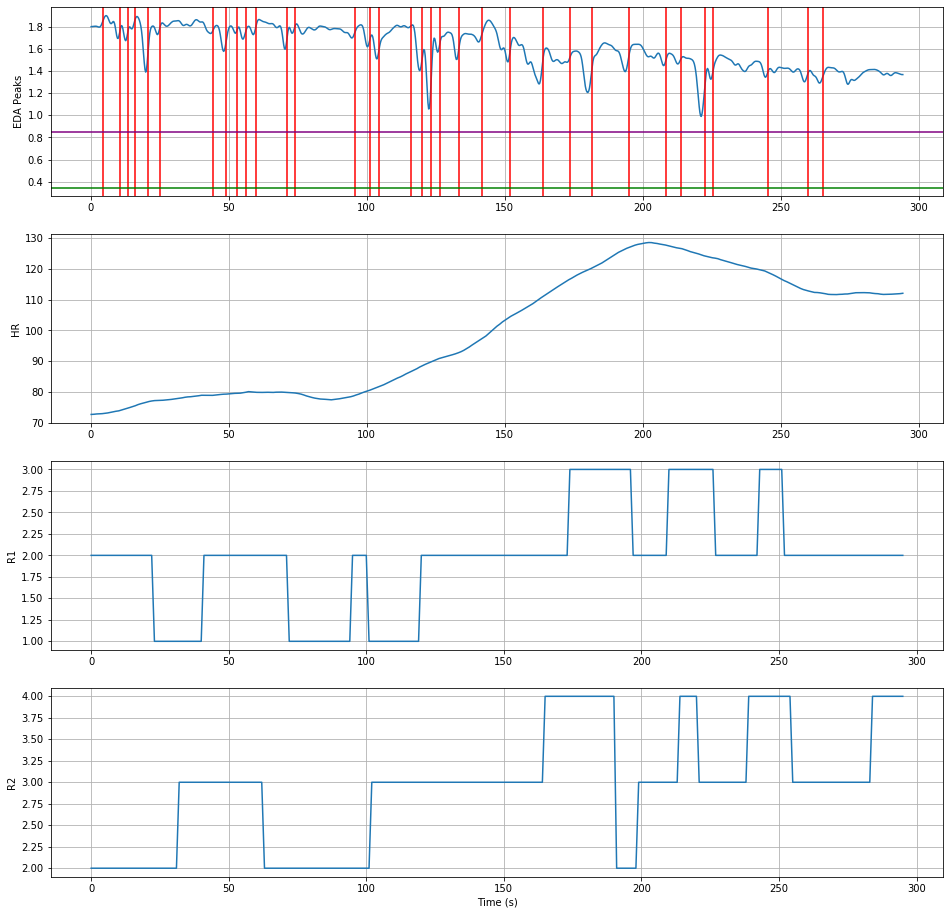

EDA Relax Average: 1.6789
EDA Prep Average: 0.9741


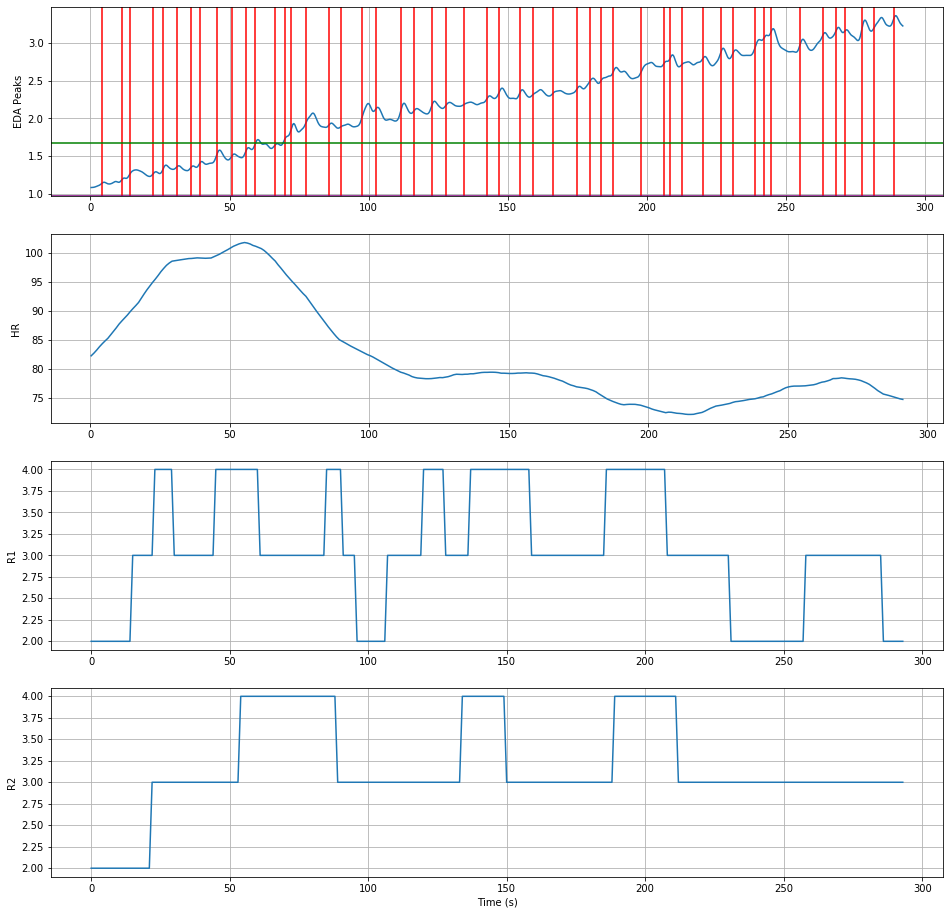

Participant 002 does not have baselines
EDA Relax Average: 5.4931
EDA Prep Average: 6.7146


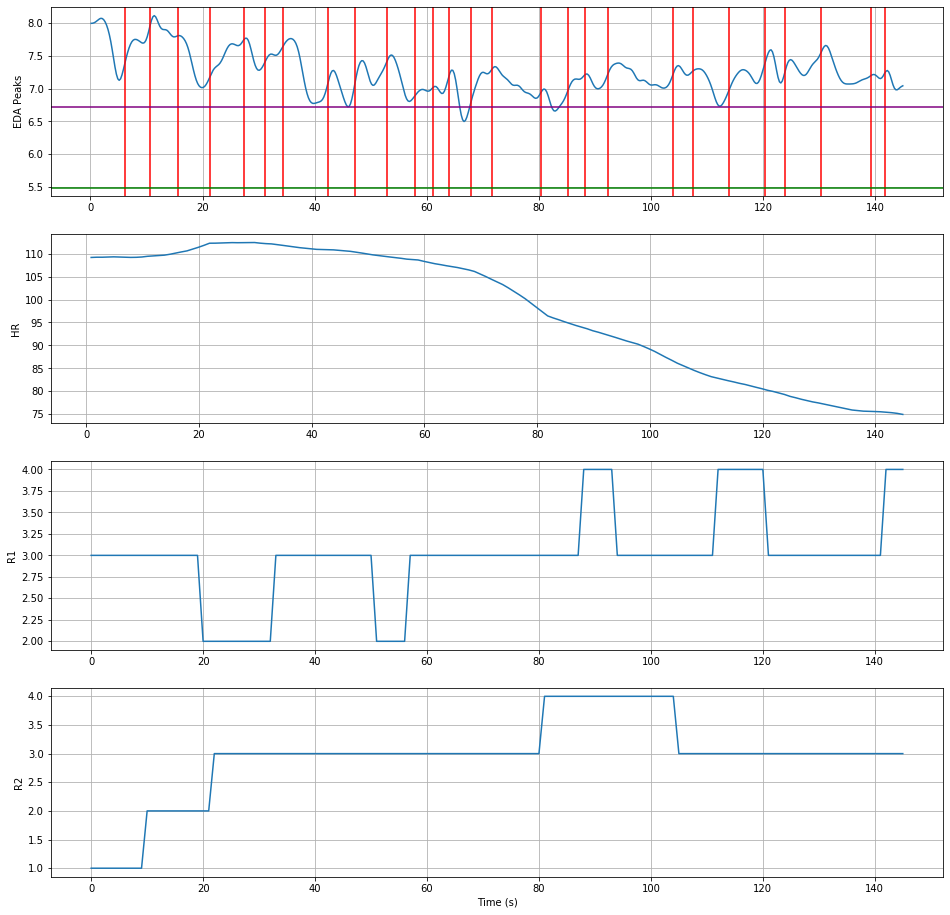

EDA Relax Average: 0.2445
EDA Prep Average: 0.3430


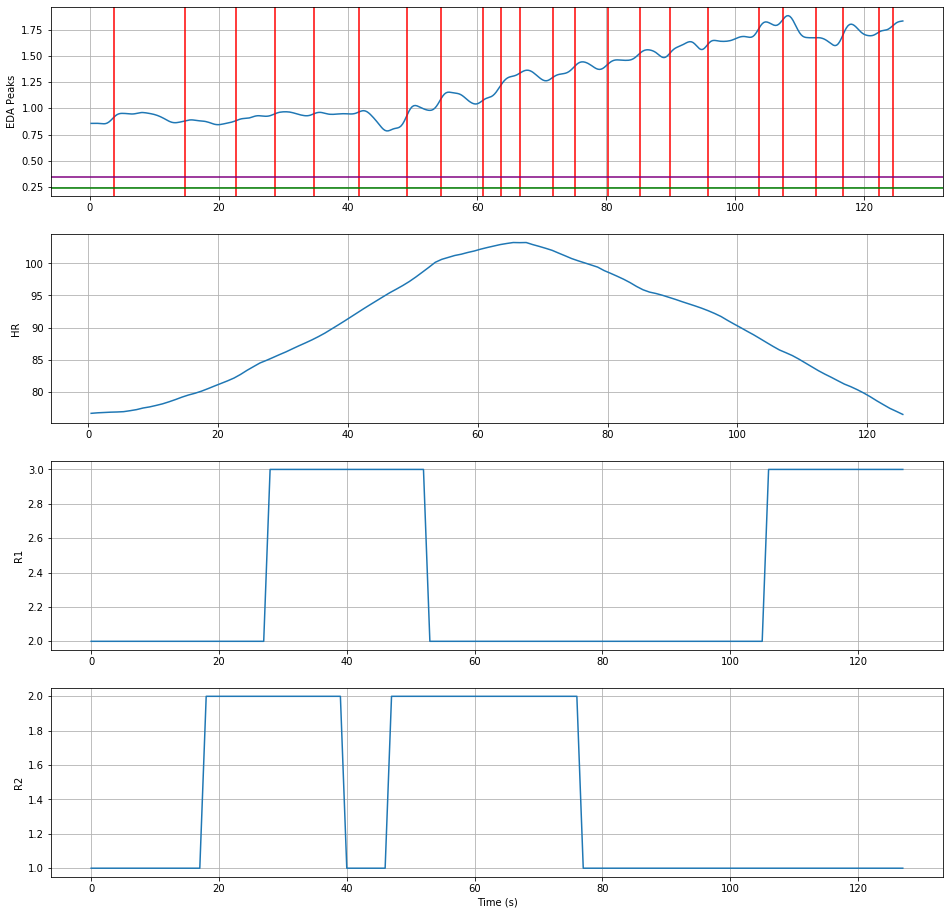

Participant 030 does not have baselines
EDA Relax Average: 0.0485
EDA Prep Average: 0.0512


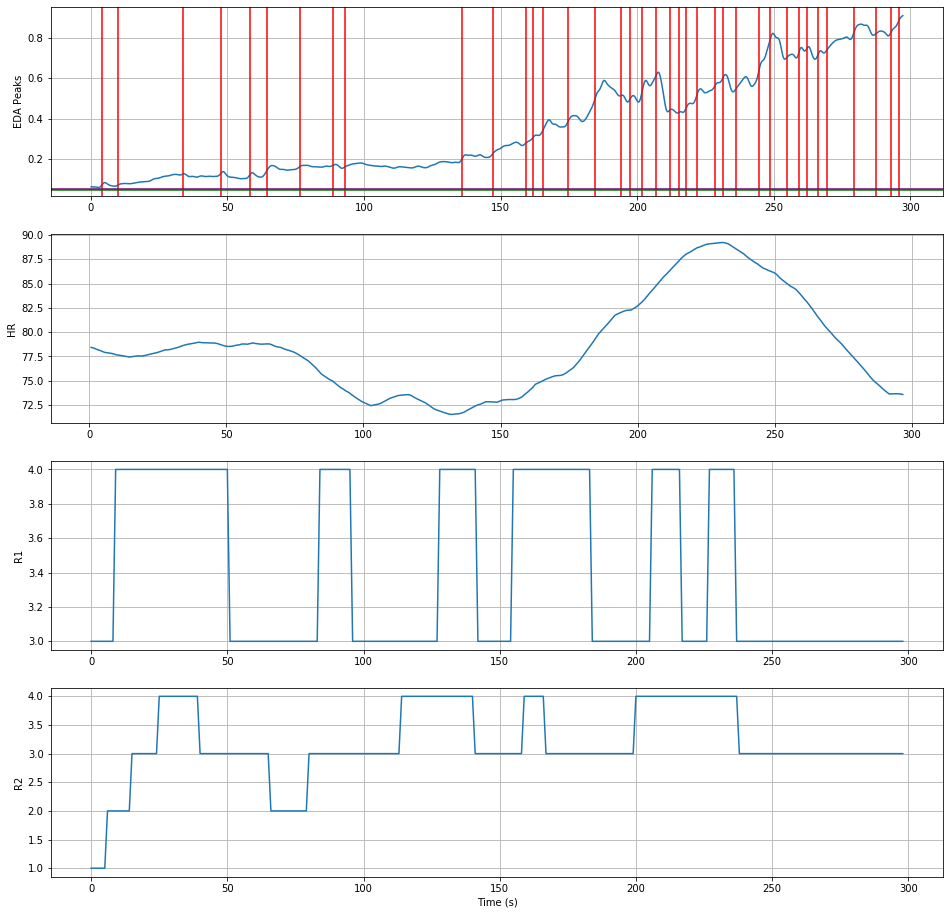

EDA Relax Average: 0.2239
EDA Prep Average: 0.2150


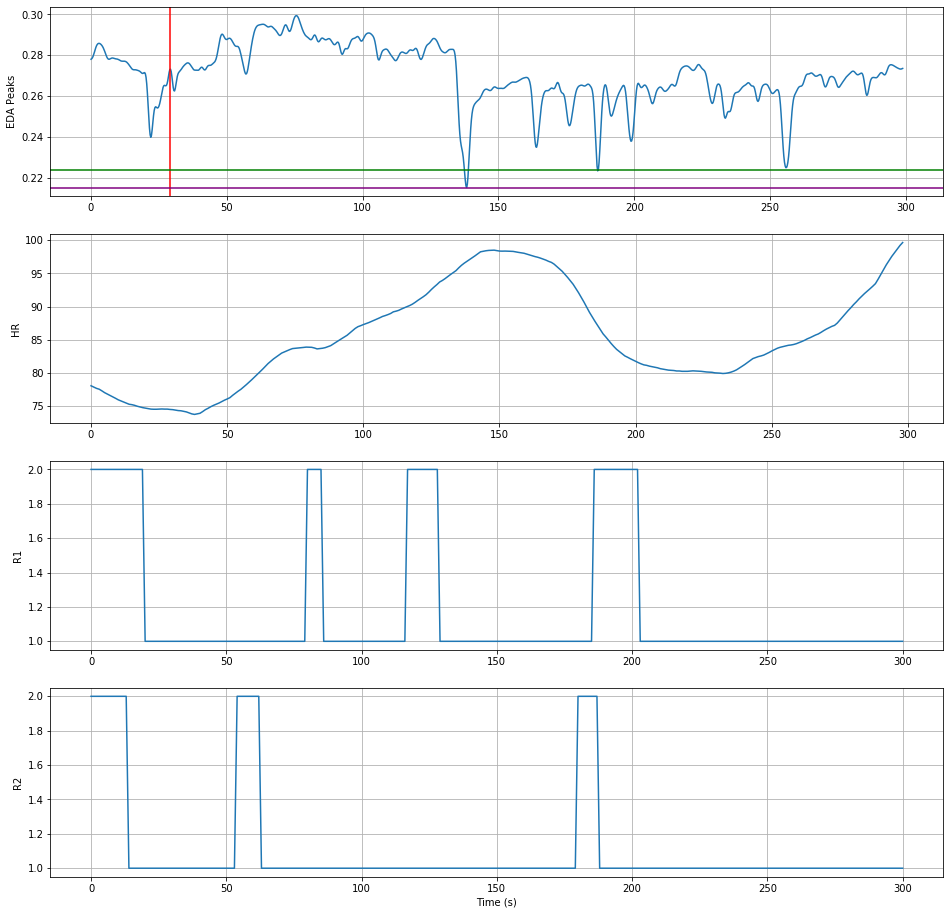

EDA Relax Average: 0.2073
EDA Prep Average: 0.0709


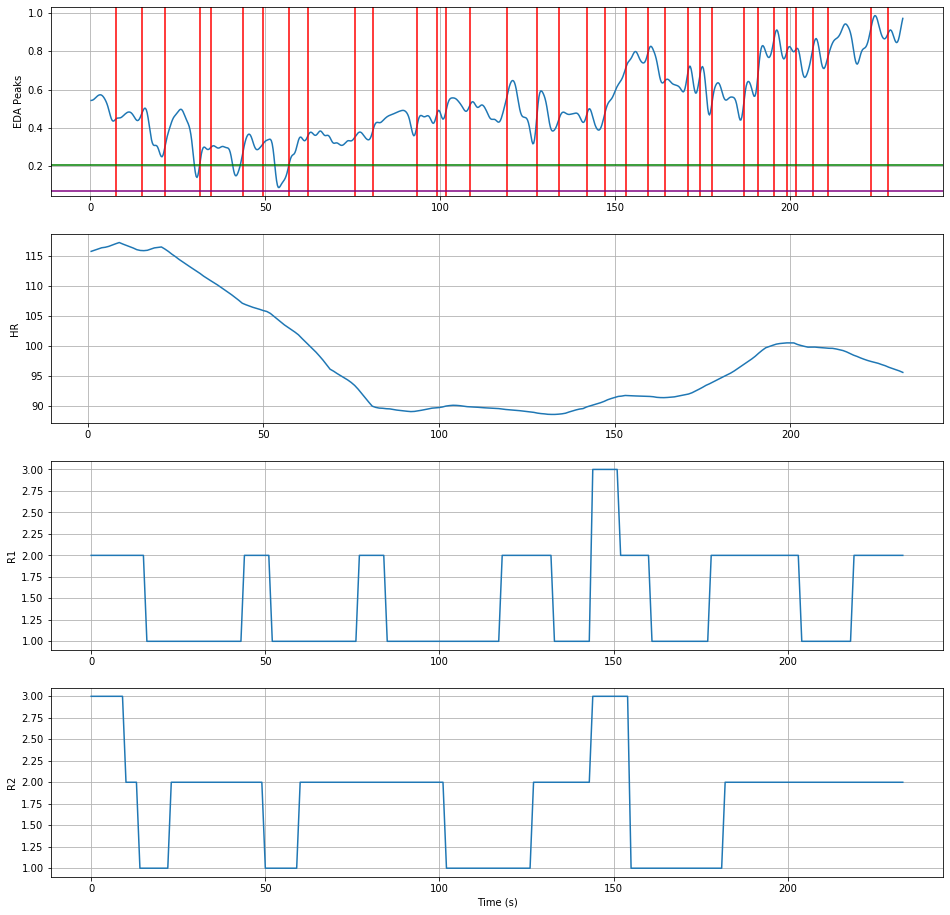

EDA Relax Average: 0.0704
EDA Prep Average: 0.0648


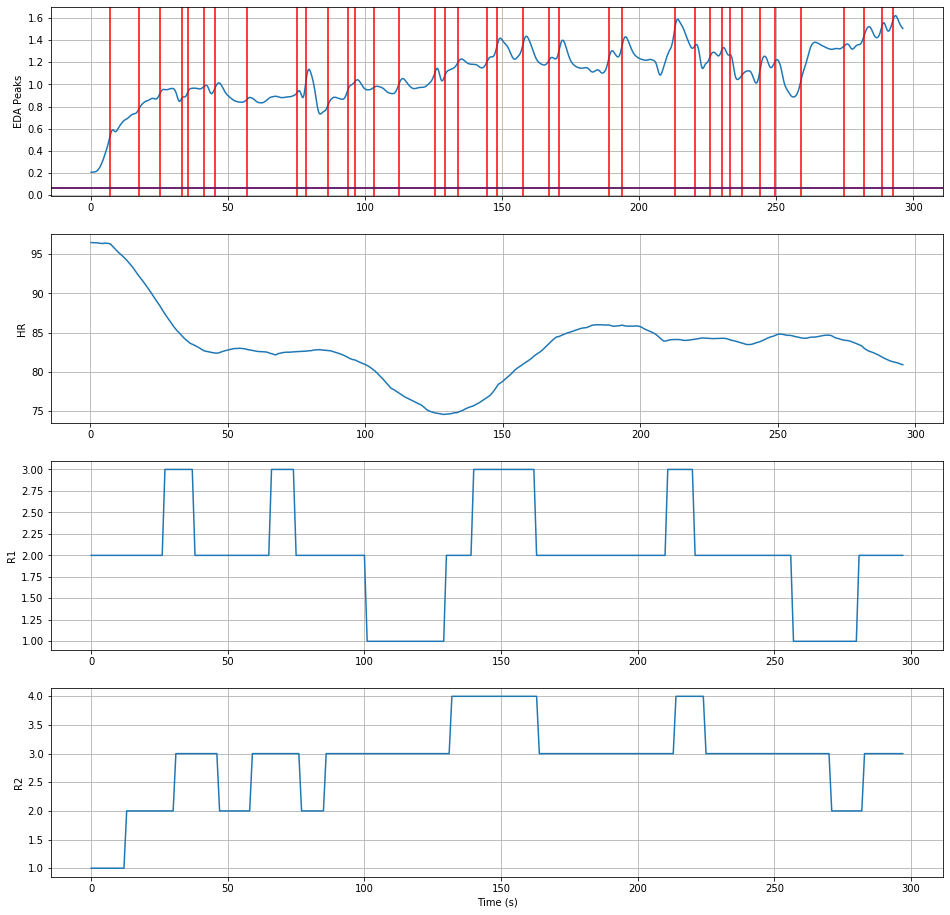

EDA Relax Average: 0.2372
EDA Prep Average: 0.2423


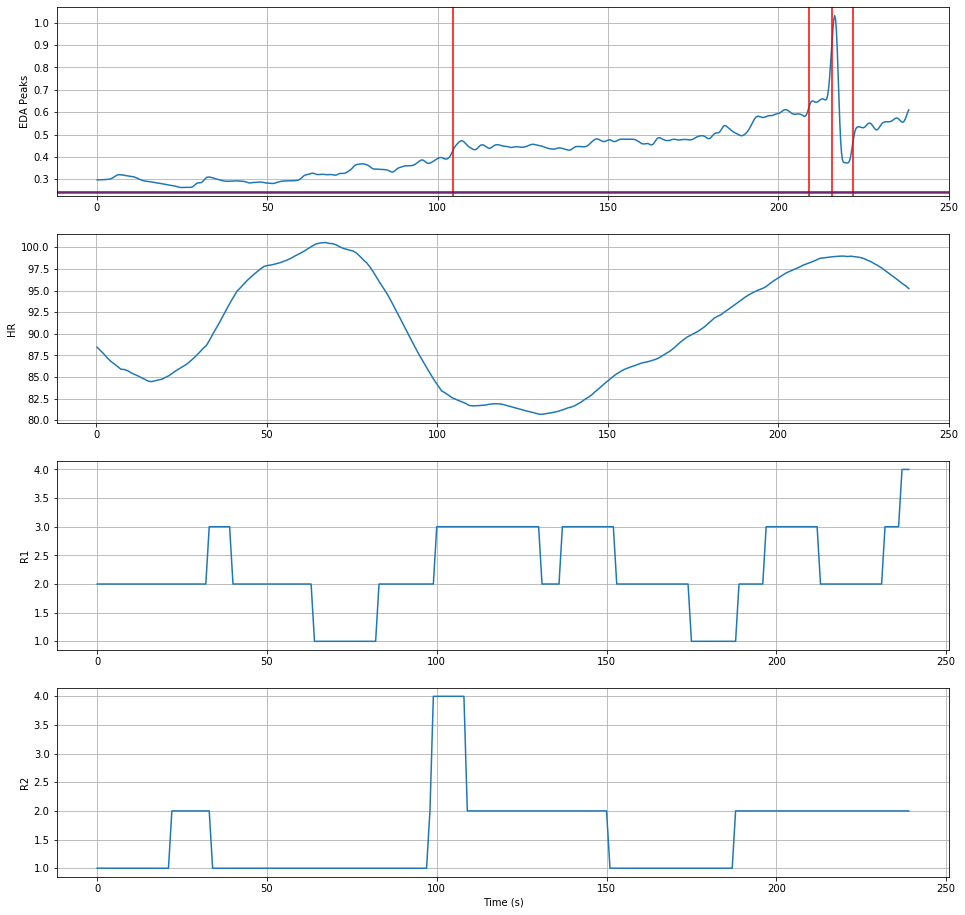

EDA Relax Average: 0.2083
EDA Prep Average: 0.2761


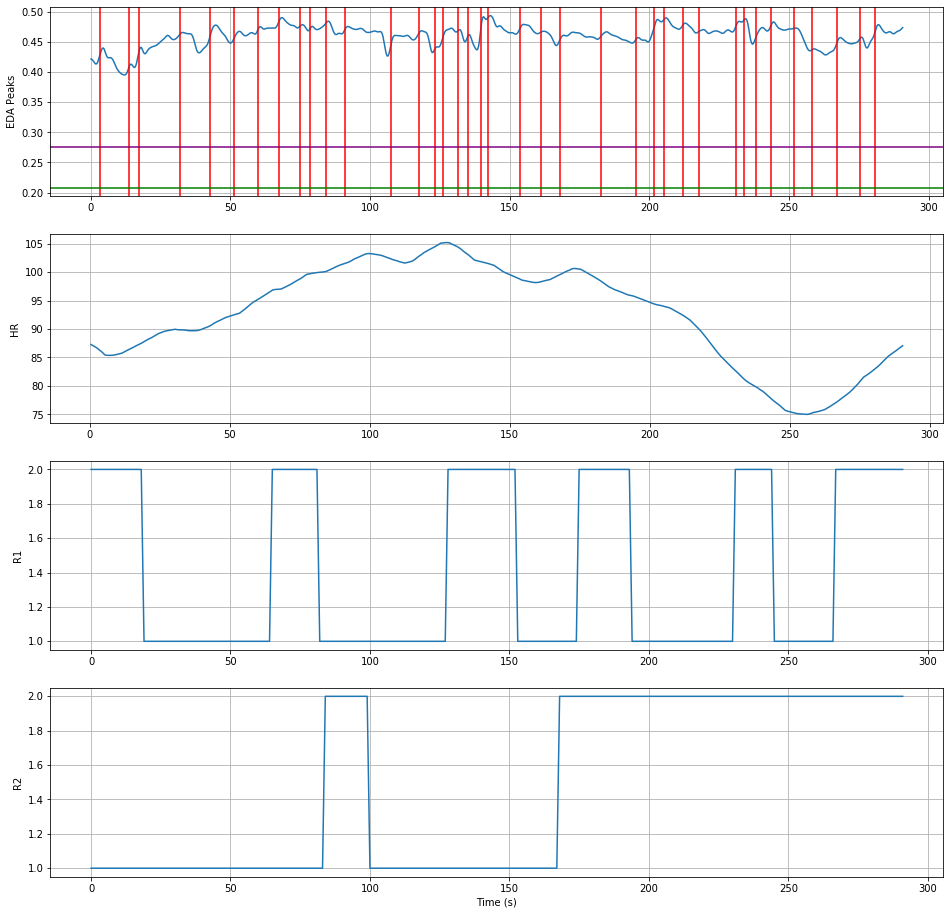

Participant 028 does not have baselines
EDA Relax Average: 0.5451
EDA Prep Average: 0.7739


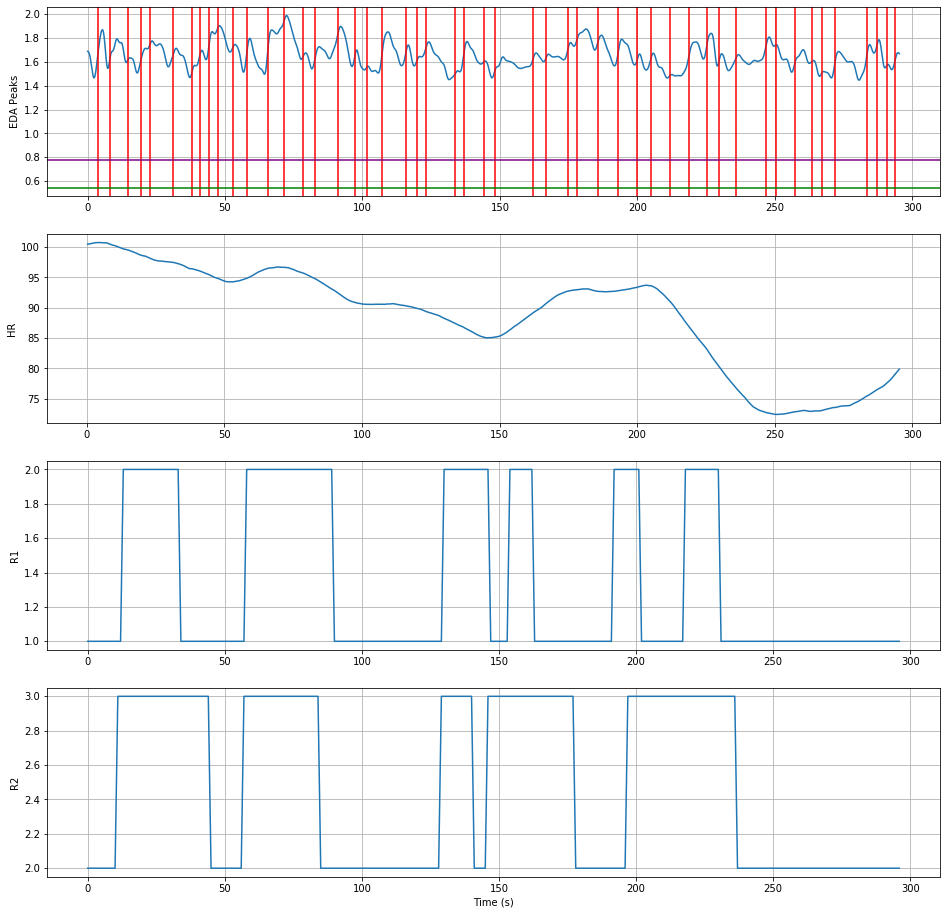

EDA Relax Average: 5.1303
EDA Prep Average: 2.4527


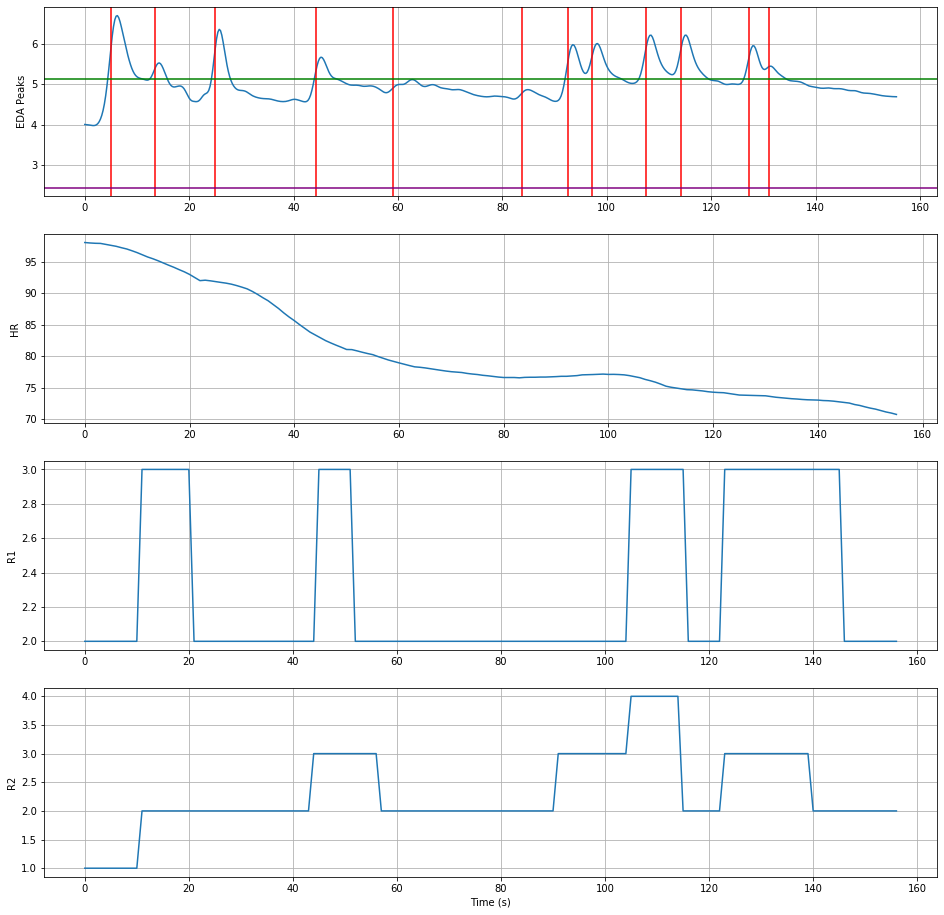

EDA Relax Average: 0.1018
EDA Prep Average: 0.1644


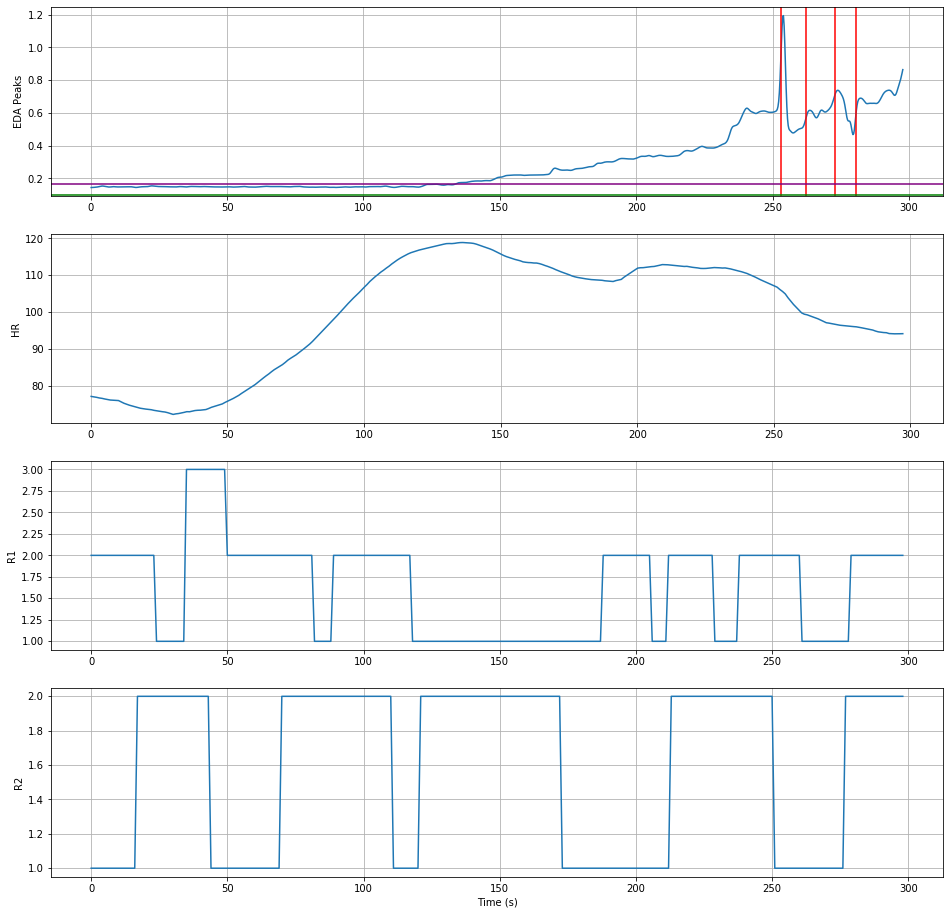

EDA Relax Average: 0.0425
EDA Prep Average: 0.0397


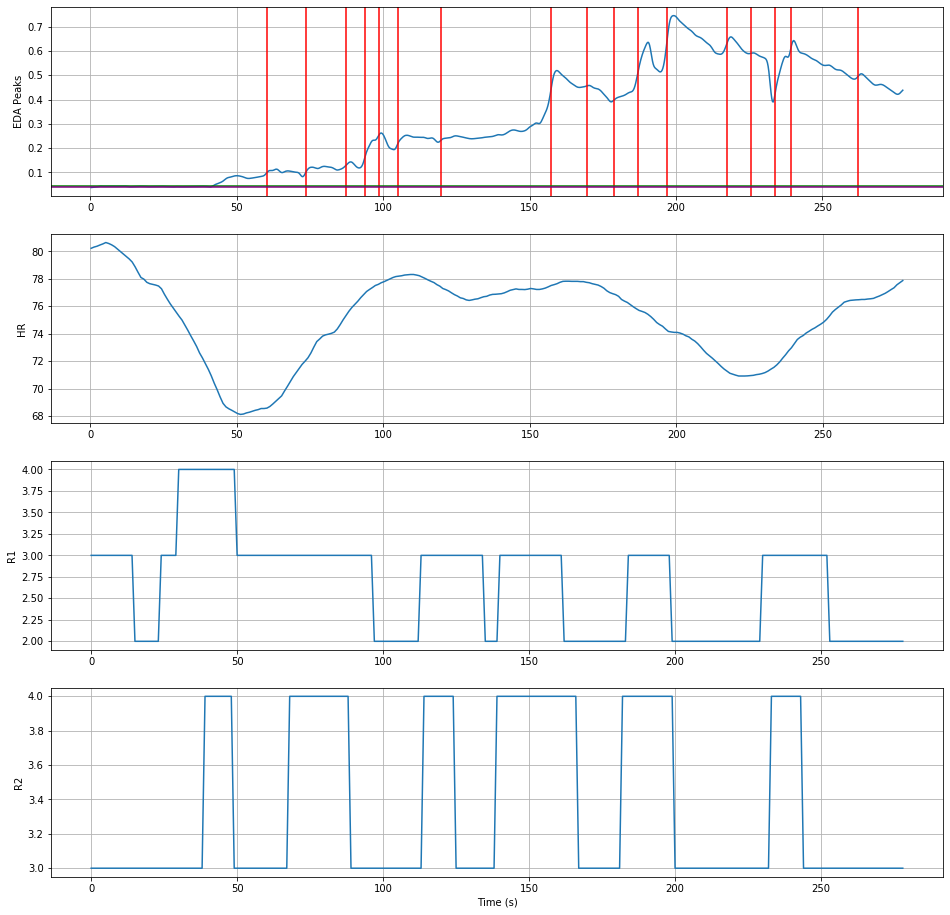

EDA Relax Average: 0.8123
EDA Prep Average: 0.5714


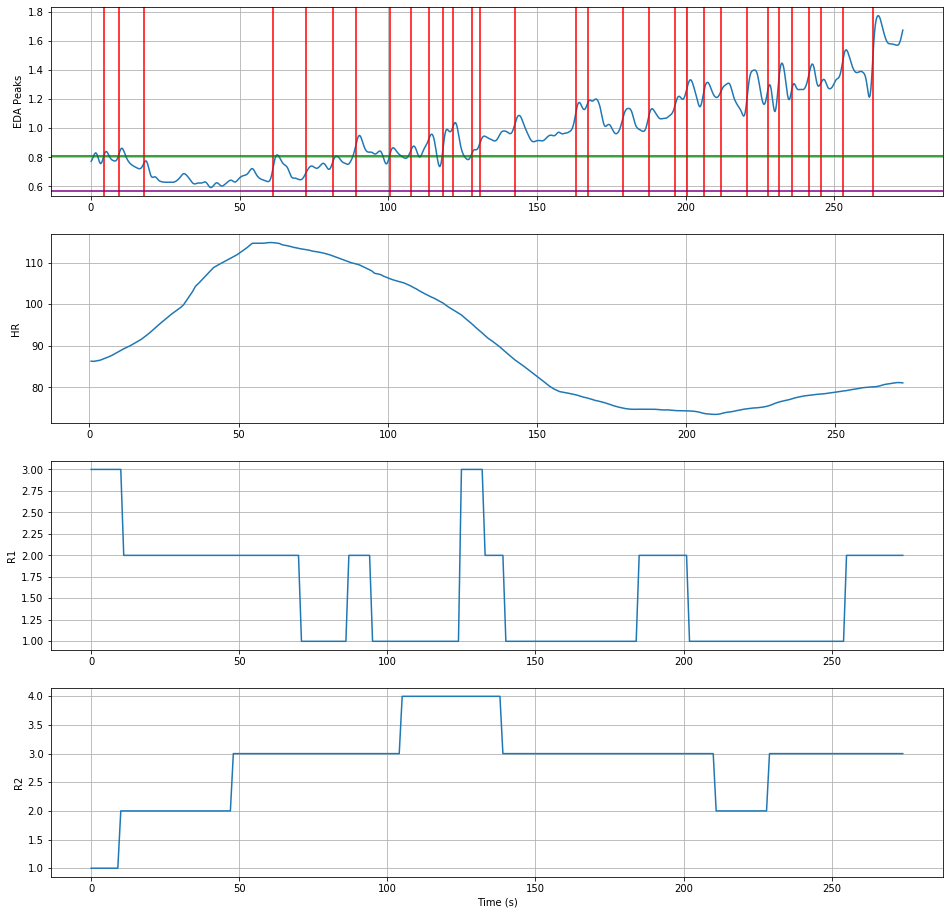

Participant 069 does not have baselines
EDA Relax Average: 0.3964
EDA Prep Average: 0.4458


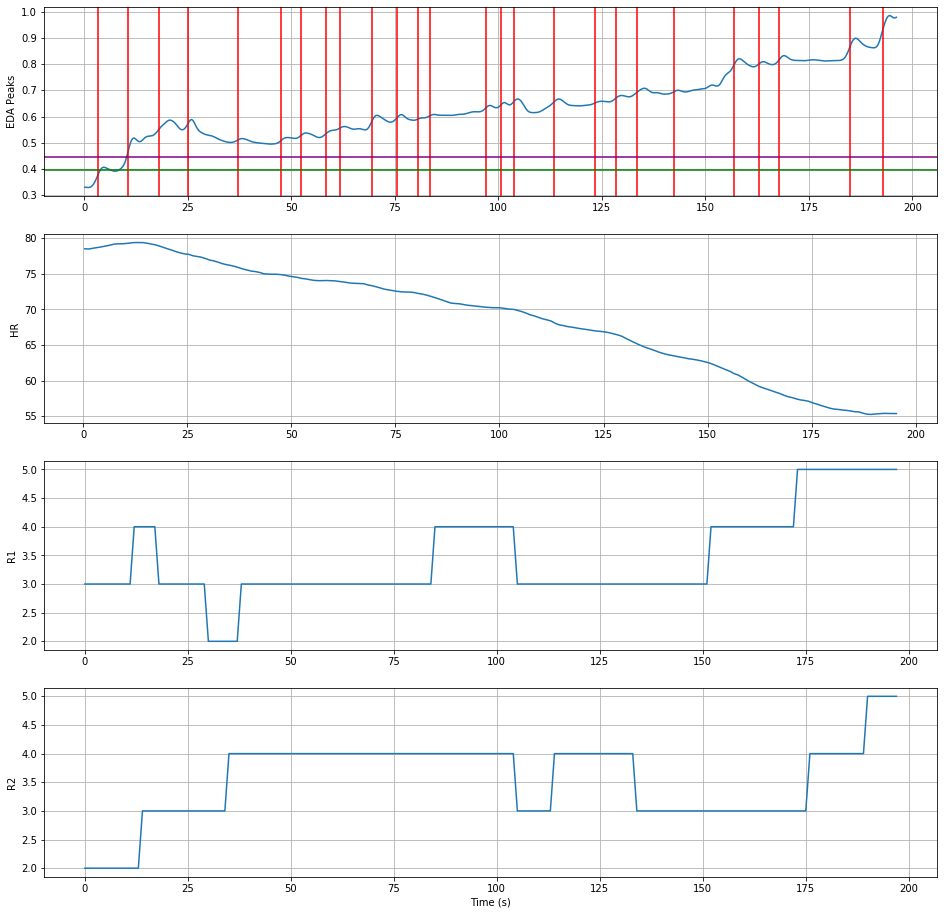

EDA Relax Average: 0.1208
EDA Prep Average: 0.1460


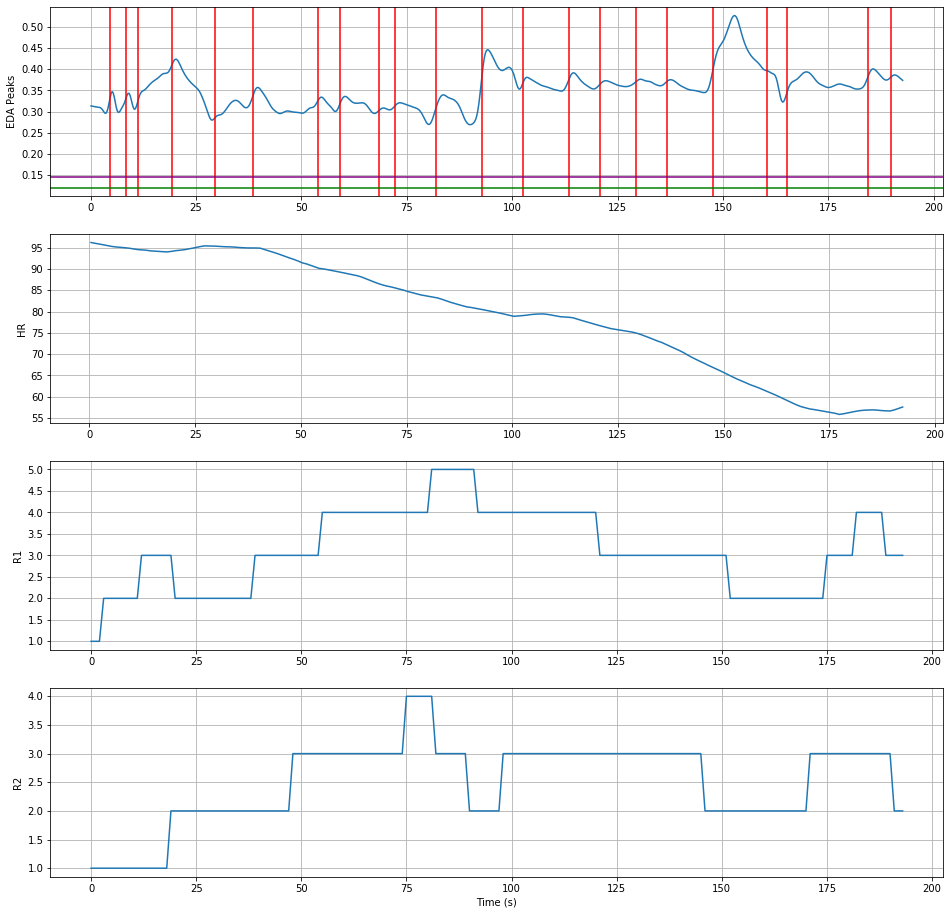

In [44]:
for pt in pts:

    base_path = f'data/raw_data/P{pt:03d}/'

    eda_relax_path = os.path.join(base_path, 'PRE/E4_EDA_RELAX.xlsx')
    eda_prep_path = os.path.join(base_path, 'PRE/E4_EDA_PREP.xlsx')

    try:

        eda_relax_df = pd.read_excel(eda_relax_path, engine='openpyxl')
        eda_prep_df = pd.read_excel(eda_prep_path, engine='openpyxl')

        eda_relax_avg = eda_relax_df['EDA'].mean()
        eda_prep_avg = eda_prep_df['EDA'].mean()

    except IOError:
        print(f'Participant {pt:03d} does not have baselines')
        continue

    for session in ['PRE', 'POST','TEST01', 'TEST02','TEST03','TEST04','TEST05','TEST']:

        session_path = os.path.join(base_path, session)
        eda_path = os.path.join(session_path, 'E4_EDA_PPT.xlsx')
        hr_path = os.path.join(session_path, 'E4_HR_PPT.xlsx')
        annotation_path = os.path.join(session_path, 'annotation.xlsx')
        

        try:
            annotation_df = pd.read_excel(annotation_path, engine='openpyxl')

            annotations_r1 = annotation_df['R1'].to_numpy()
            annotations_r2 = annotation_df['R2'].to_numpy()
            
            annotations_r1 = median_filter(annotations_r1, size=10)
            annotations_r2 = median_filter(annotations_r2, size=10)

            annotation_times = annotation_df['Time (s)'].to_numpy()
        except IOError:
            continue

        try:

            eda_df = pd.read_excel(eda_path, engine='openpyxl')         

            eda_times = eda_df['Time (s)'].to_numpy()
            original_eda = eda_df['EDA'].to_numpy()
            eda_signal = eda_df['EDA'].to_numpy()
            
            # Filter EDA with NK
            sr = 4
            order = 4
            w0 = 1.5 # Cutoff frequency 
            w0 = 2 * np.array(w0) / sr 

            eda_signal = nk.signal_sanitize(eda_signal)
            b, a = scipy.signal.butter(N=order, Wn=w0, btype='lowpass', analog=False, output='ba')
            eda_signal = scipy.signal.filtfilt(b, a, eda_signal)
            eda_signal = nk.signal_smooth(eda_signal, method='convolution', kernel='blackman', size=16)
            
            eda_decomp = nk.eda_phasic(eda_signal, sampling_rate=sr)
            
            eda_peaks, info = nk.eda_peaks(
                eda_decomp['EDA_Phasic'].values,
                sampling_rate=sr,
                method='biosppy',
                amplitude_min=0.1
            )
            
            peak_indices = info['SCR_Peaks'] 
            eda_tonic = eda_decomp['EDA_Tonic']
            
        except IOError:
            continue
            
        try:
            
            hr_df = pd.read_excel(hr_path, engine='openpyxl')
            
            hr_times = hr_df['Time (s)'].to_numpy()
            hr_data = hr_df['HR'].to_numpy()
            
        except:
            continue
            
        print(f'EDA Relax Average: {eda_relax_avg:.4f}\nEDA Prep Average: {eda_prep_avg:.4f}')
            
        fig = plt.figure(figsize=(16,16))
        
        ax1 = fig.add_subplot(411)
        ax1.plot(eda_times, eda_signal)
        ax1.grid()
        ax1.set_ylabel('EDA Peaks')
        
        for index in peak_indices:
            plt.axvline(x=eda_times[index], color='red')
        
        plt.axhline(y=eda_relax_avg, color='green')
        plt.axhline(y=eda_prep_avg, color='purple')
        
        ax1 = fig.add_subplot(412)
        ax1.plot(hr_times, hr_data)
        ax1.grid()
        ax1.set_ylabel('HR')
        
        ax3 = fig.add_subplot(413)
        ax3.plot(annotation_times, annotations_r1)
        ax3.grid()
        ax3.set_ylabel('R1')
        
        ax4 = fig.add_subplot(414)
        ax4.plot(annotation_times, annotations_r2)
        ax4.grid()
        ax4.set_ylabel('R2')
        ax4.set_xlabel('Time (s)')
                       
                       
        plt.show()            